<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آمارتوصیفی
</font>
</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statistics as st
from itertools import combinations
import seaborn as sns
import mysql.connector

In [2]:
conn=mysql.connector.connect(host='localhost', user='root', password='arvin1381', database='project',raise_on_warnings= True)

In [3]:
cu=conn.cursor()

In [4]:
cu.execute('select * from coinhistories')
tab1=cu.fetchall()
cu.execute('select * from coins')
tab2=cu.fetchall()

In [5]:
coinhis=pd.DataFrame(tab1,columns=['id', 'name', 'Date', 'open', 'timeHigh', 'high', 'timeLow', 'low','close', 'volume', 'marketCap', 'DailyPrice', 'CirculatingSupply','DailyChange', 'ChangeStatus'])
coin=pd.DataFrame(tab2,columns=['rank', 'name', 'symbol', 'MainLink', 'HistoricalLink', 'Github_link'])

In [6]:
coinhis['Price change']=coinhis['close']-coinhis['open']

In [7]:
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099


In [8]:
coin

,rank,name,symbol,MainLink,HistoricalLink,Github_link
0,154,0x Protocol,ZRX,https://coinmarketcap.com/currencies/0x/,https://coinmarketcap.com/currencies/0x/histor...,https://github.com/0xProject
1,110,1inch Network,1INCH,https://coinmarketcap.com/currencies/1inch/,https://coinmarketcap.com/currencies/1inch/his...,https://github.com/1inch
2,43,Aave,AAVE,https://coinmarketcap.com/currencies/aave/,https://coinmarketcap.com/currencies/aave/hist...,https://github.com/aave/aave-protocol/blob/mas...
3,136,aelf,ELF,https://coinmarketcap.com/currencies/aelf/,https://coinmarketcap.com/currencies/aelf/hist...,https://github.com/aelfProject
4,101,Akash Network,AKT,https://coinmarketcap.com/currencies/akash-net...,https://coinmarketcap.com/currencies/akash-net...,None
...,...,...,...,...,...,...
195,46,XDC Network,XDC,https://coinmarketcap.com/currencies/xdc-network/,https://coinmarketcap.com/currencies/xdc-netwo...,https://github.com/xinfinorg
196,5,XRP,XRP,https://coinmarketcap.com/currencies/xrp/,https://coinmarketcap.com/currencies/xrp/histo...,https://github.com/ripple/rippled
197,130,yearn.finance,YFI,https://coinmarketcap.com/currencies/yearn-fin...,https://coinmarketcap.com/currencies/yearn-fin...,https://github.com/yearn/iearn-finance
198,78,Zcash,ZEC,https://coinmarketcap.com/currencies/zcash/,https://coinmarketcap.com/currencies/zcash/his...,https://github.com/zcash/zips/blob/master/prot...




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
۱)ارتباط میان ارزش معاملات و حجم معاملات روزانه
</font>
</p>

Plotting daily volume by market cap per coin

Text(0, 0.5, 'Coin daily volume')

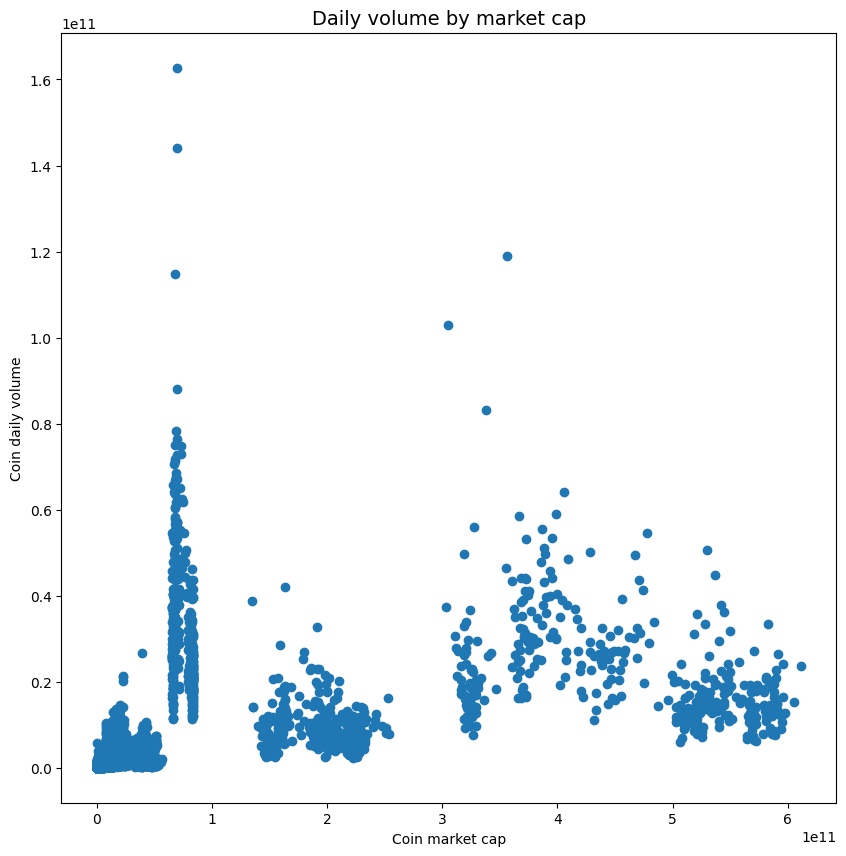

In [9]:
fig, axes = plt.subplots(figsize = (10,10))

plt.scatter(coinhis['marketCap'], coinhis['volume'])

plt.title('Daily volume by market cap', fontsize = 14)
plt.xlabel('Coin market cap', fontsize = 10)
plt.ylabel('Coin daily volume', fontsize = 10)

Categorizing based on the previous plot.

In [10]:
def salary_stats(value):
    if value < 100000000000:
        return "low"
    if value < 300000000000:
        return "average"
    elif value < 500000000000:
        return "high"

In [11]:
coinhis['mc_stats'] = coinhis['marketCap'].map(salary_stats)
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380,low
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low


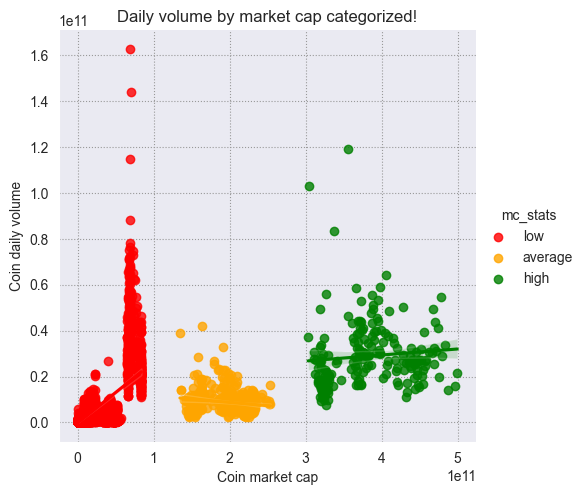

In [12]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lmplot(x = 'marketCap', y = 'volume', data = coinhis, hue = 'mc_stats', palette=['red','orange','green'], fit_reg = True)

plt.title('Daily volume by market cap categorized!', fontsize = 12)
plt.xlabel('Coin market cap', fontsize = 10)
plt.ylabel('Coin daily volume', fontsize = 10)

plt.show()

Clustering (categorizing) using kmeans

In [13]:
from scipy.cluster.vq import kmeans, vq
y = np.array(coinhis['marketCap'])
codebook, _ = kmeans(y, 3)
cluster_indices, _ = vq(y, codebook)
coinhis['clusters'] = cluster_indices

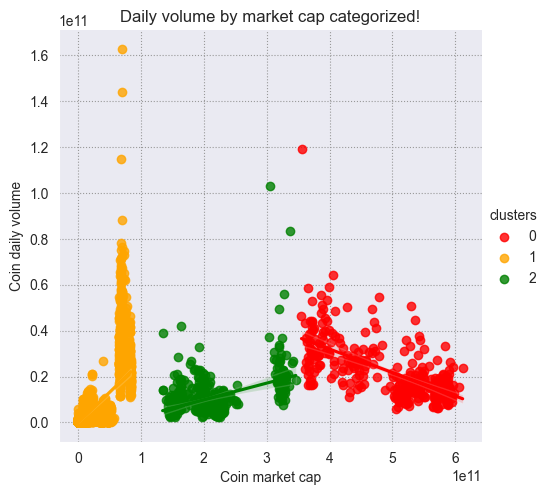

In [14]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lmplot(x = 'marketCap', y = 'volume', data = coinhis, hue = 'clusters', palette=['red','orange','green'], fit_reg = True)

plt.title('Daily volume by market cap categorized!', fontsize = 12)
plt.xlabel('Coin market cap', fontsize = 10)
plt.ylabel('Coin daily volume', fontsize = 10)

plt.show()

As it shows, it's not always what you see!

Either our clusters are very similar or our chosen thresholds based on eye observations were invalid!

Trying Two clusters too!

In [15]:
def salary_stats(value):
    if value < 280000000000:
        return "low"
    else:
        return "high"

In [16]:
coinhis['mc_stats'] = coinhis['marketCap'].map(salary_stats)
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380,low,1
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low,1
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1


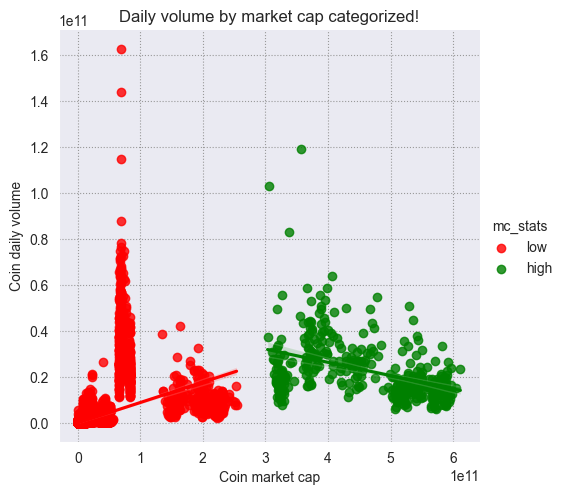

In [17]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lmplot(x = 'marketCap', y = 'volume', data = coinhis, hue = 'mc_stats', palette=['red','green'], fit_reg = True)

plt.title('Daily volume by market cap categorized!', fontsize = 12)
plt.xlabel('Coin market cap', fontsize = 10)
plt.ylabel('Coin daily volume', fontsize = 10)

plt.show()

In [18]:
y = np.array(coinhis['marketCap'])
codebook, _ = kmeans(y, 2)
cluster_indices, _ = vq(y, codebook)
coinhis['clusters'] = cluster_indices

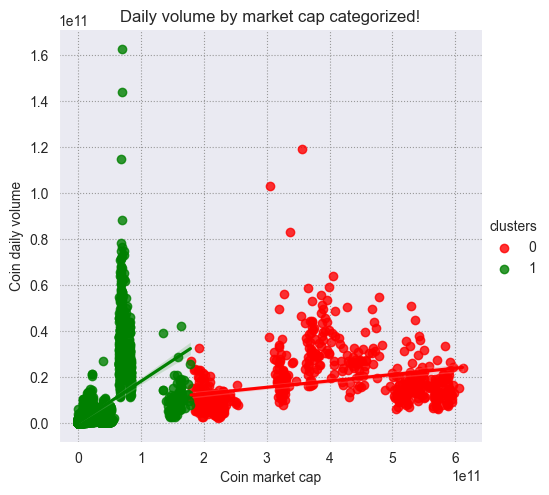

In [19]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lmplot(x = 'marketCap', y = 'volume', data = coinhis, hue = 'clusters', palette=['red','green'], fit_reg = True)

plt.title('Daily volume by market cap categorized!', fontsize = 12)
plt.xlabel('Coin market cap', fontsize = 10)
plt.ylabel('Coin daily volume', fontsize = 10)

plt.show()

It seems that scipy's clustering method needs a real shake!


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
۲)تغییرات هم سو
</font>
</p>

Finding integrated coins

In [20]:
names=list(coin['name'])
name_per=list(combinations(names,2))

In [21]:
s_dir=[]
for iter in name_per:
    first=coinhis[coinhis['name']==iter[0]][['Date','Price change']]
    second=coinhis[coinhis['name']==iter[1]][['Date','Price change']]
    counter=0
    for k in range(min(len(first),len(second))):
        if (first.iloc[k]['Price change'] * second.iloc[k]['Price change'])>=0:
            counter+=1
    s_dir.append((counter,iter[0],iter[1]))

In [22]:
s_dir.sort(key=lambda x:x[0],reverse=True)

In [23]:
pd.DataFrame(s_dir[:30],columns=['count',
            'first coin',
            'second coin'],index=list(range(1,31)))

,count,first coin,second coin
1,351,Bitcoin,Wrapped Bitcoin
2,323,Decentraland,The Sandbox
3,318,Ethereum,Gnosis
4,317,Enjin Coin,The Sandbox
5,314,Ethereum,Wrapped Bitcoin
6,310,Decentraland,Enjin Coin
7,310,Decentraland,Oasis Network
8,310,Decentraland,VeChain
9,309,Axie Infinity,The Sandbox
10,309,Bitcoin,Ethereum


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
۳)توزیع حجم ارزهای استخراج پذیر  </font>
</p>

Plotting mineables daily volume

Then zooming a little bit!

In [24]:
cu.execute('select * from cointag')
tab3=cu.fetchall()
cointag=pd.DataFrame(tab3,columns=['Name', 'Tags'])
cointag

,Name,Tags
0,Bitcoin,Mineable
1,Bitcoin,PoW
2,Bitcoin,SHA-256
3,Ethereum,PoS
4,Ethereum,Smart Contracts
...,...,...
558,Status,Media
559,Status,Content Creation
560,Status,Privacy
561,Amp,SEC Security Token


In [25]:
mineables = cointag[cointag['Tags'] == 'Mineable']
mineables

,Name,Tags
0,Bitcoin,Mineable
21,Dogecoin,Mineable
42,Litecoin,Mineable
51,Bitcoin Cash,Mineable
75,Monero,Mineable
84,Ethereum Classic,Mineable
93,Filecoin,Mineable
148,Stacks,Mineable
169,Bitcoin SV,Mineable
223,Zcash,Mineable


In [26]:
mineableshis = coinhis[coinhis['name'].isin(mineables['Name'])]
mineableshis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters
728,729,Bitcoin SV,2023-08-31,32.6322,0 days 01:46:00,33.1578,0 days 01:49:00,31.1920,31.2290,25036200.0,601659000.0,31.2290,19266100.0,-1.400170,Red,-1.4032,low,1
729,730,Bitcoin SV,2023-08-30,33.7950,0 days 00:01:00,33.8772,0 days 07:09:00,32.3723,32.6291,25312400.0,628635000.0,32.6291,19266100.0,-1.151650,Red,-1.1659,low,1
730,731,Bitcoin SV,2023-08-29,31.2698,0 days 07:37:00,34.5275,0 days 09:08:00,30.6462,33.7808,43793500.0,650823000.0,33.7808,19266100.0,2.521510,Green,2.5110,low,1
731,732,Bitcoin SV,2023-08-28,31.0865,0 days 03:23:00,31.7191,0 days 00:25:00,30.1708,31.2593,32792600.0,602243000.0,31.2593,19266100.0,0.169223,Green,0.1728,low,1
732,733,Bitcoin SV,2023-08-27,29.9220,0 days 03:14:00,31.6948,0 days 01:45:00,29.8195,31.0900,35531300.0,598983000.0,31.0900,19266100.0,1.165850,Green,1.1680,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64137,64138,Zcash,2022-09-06,63.4368,0 days 01:19:00,66.0212,0 days 03:58:00,58.2331,58.2374,73502100.0,885655000.0,58.2374,15207700.0,-5.209170,Red,-5.1994,low,1
64138,64139,Zcash,2022-09-05,63.8739,0 days 00:07:00,64.1982,0 days 00:49:00,62.2915,63.4466,52197700.0,964421000.0,63.4466,15200500.0,-0.425481,Red,-0.4273,low,1
64139,64140,Zcash,2022-09-04,62.6346,0 days 08:29:00,64.1235,0 days 04:45:00,62.1367,63.8721,58593000.0,970429000.0,63.8721,15193300.0,1.239500,Green,1.2375,low,1
64140,64141,Zcash,2022-09-03,60.2619,0 days 03:58:00,62.6377,0 days 00:10:00,60.1089,62.6326,62869700.0,951150000.0,62.6326,15186200.0,2.375810,Green,2.3707,low,1


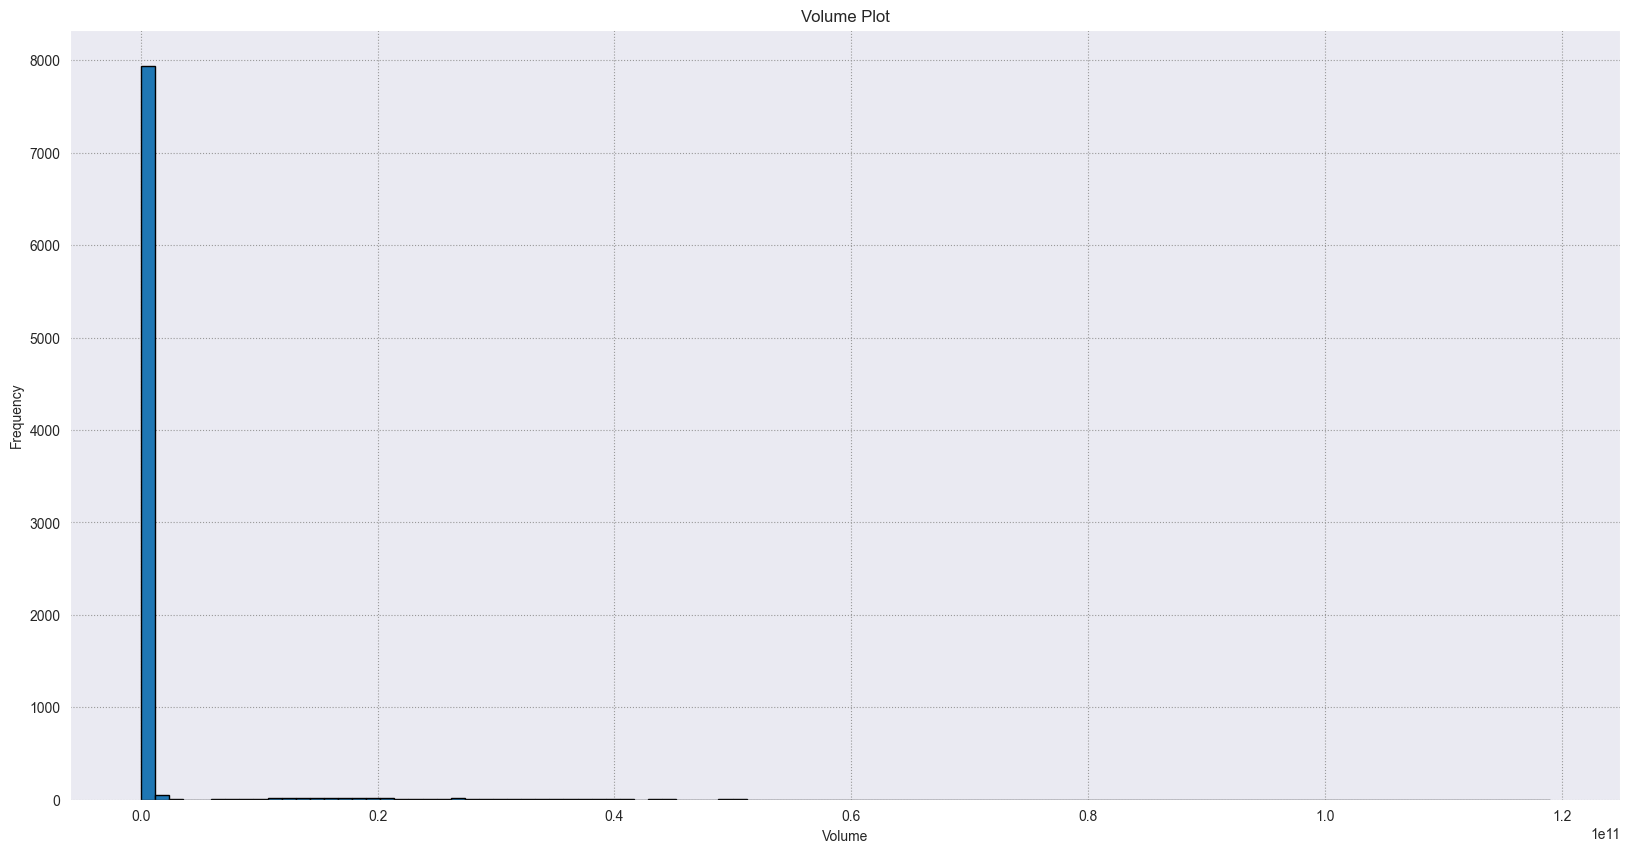

In [27]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(mineableshis['volume'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

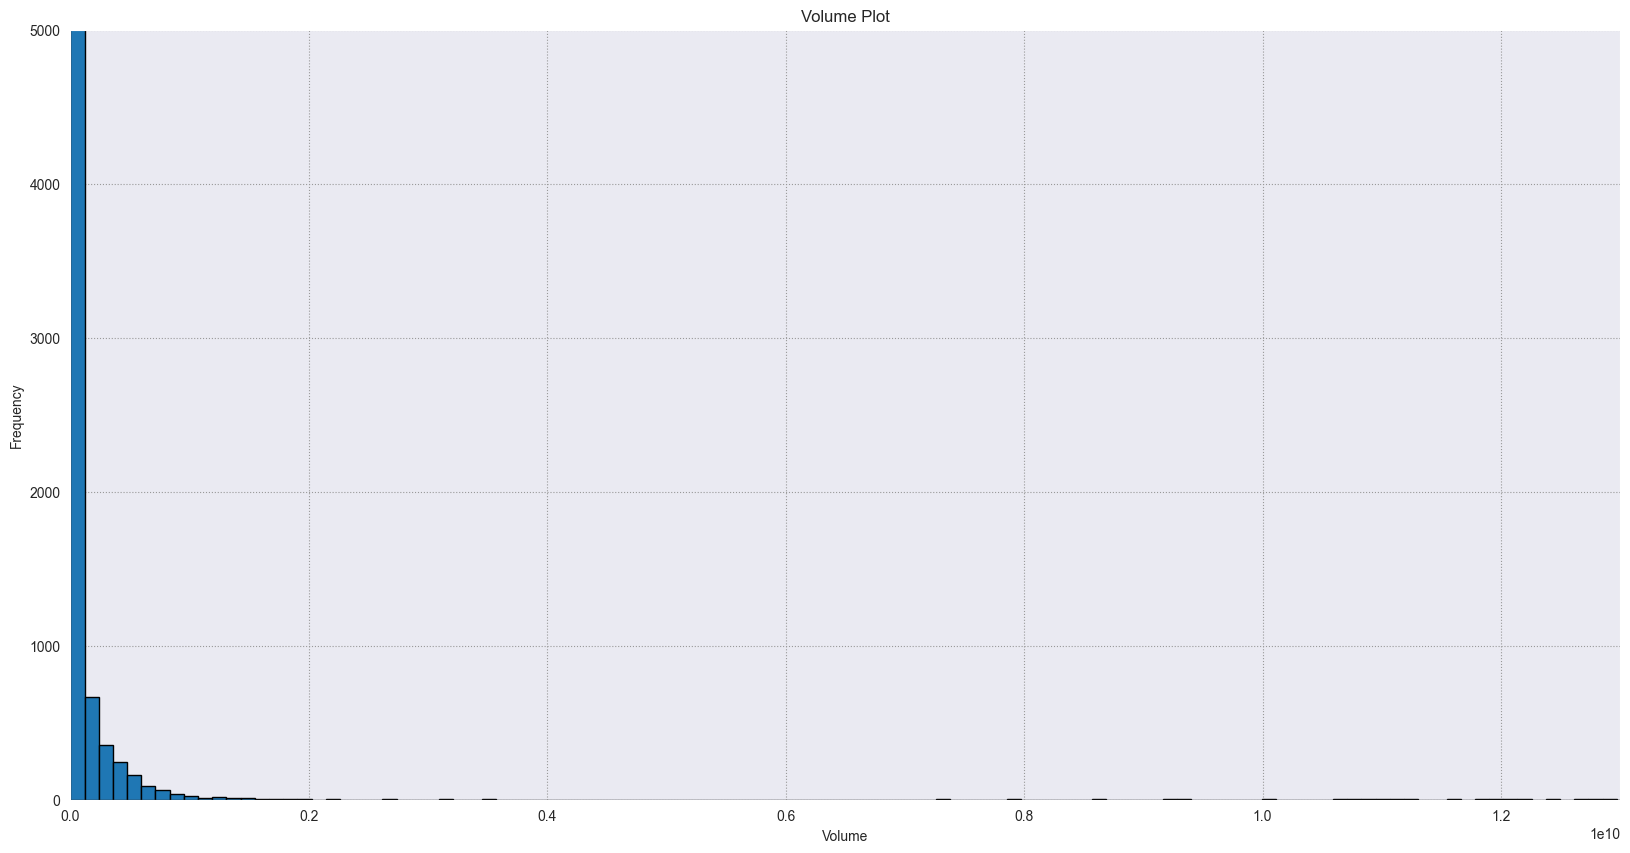

In [28]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(mineableshis['volume'],bins = 1000, edgecolor = "black", align = 'mid')
ax.set_xlim(0,13000000000)
ax.set_ylim(0,5000)
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

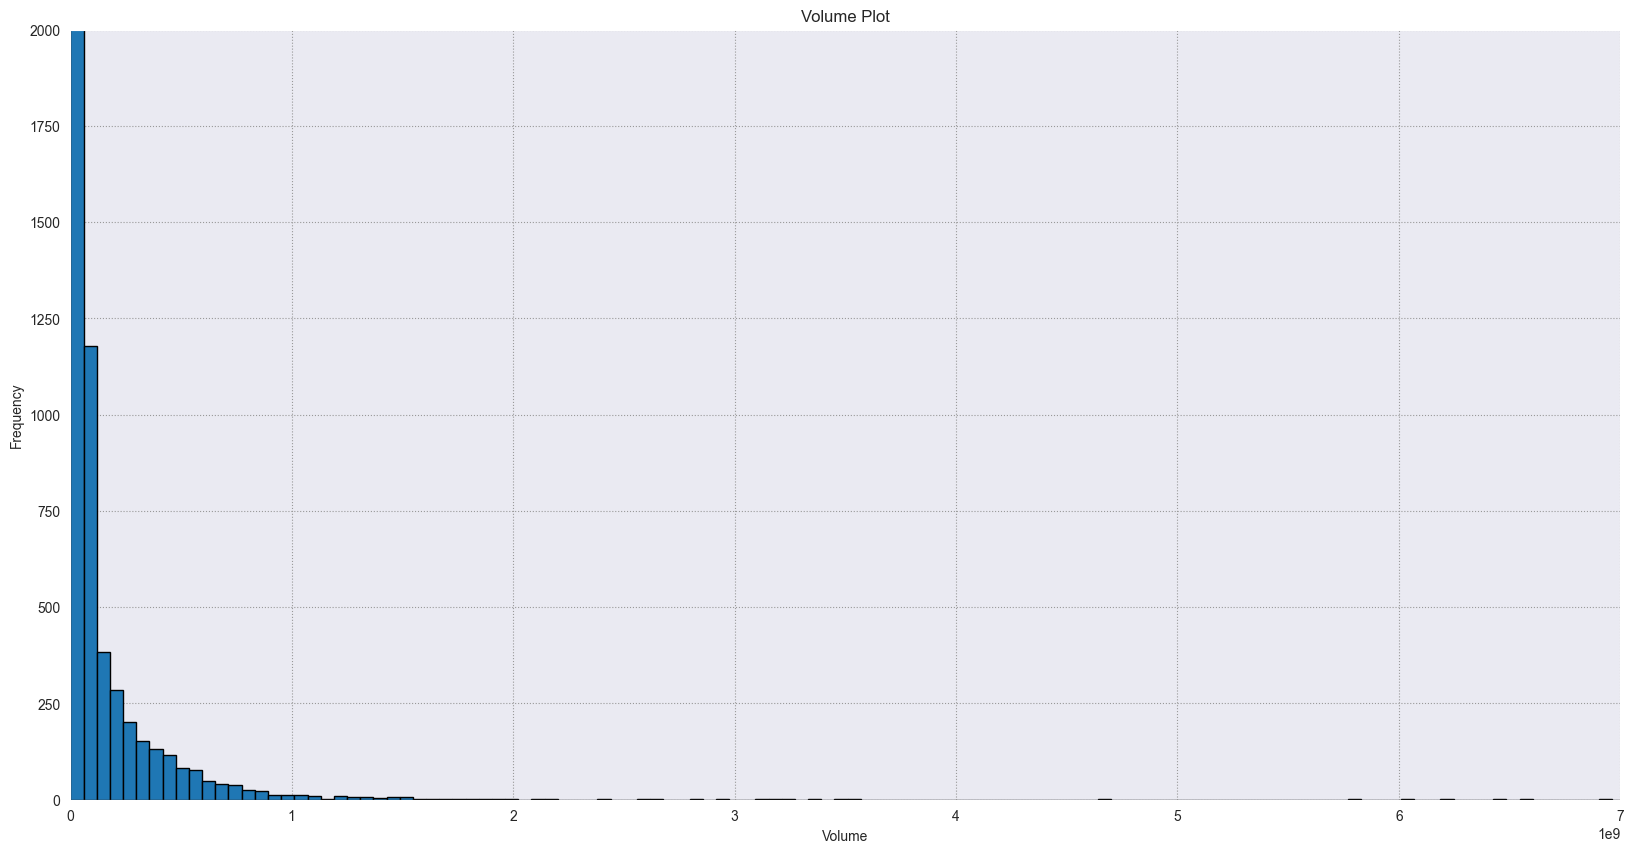

In [29]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(mineableshis['volume'],bins = 2000, edgecolor = "black", align = 'mid')
ax.set_xlim(0,7000000000)
ax.set_ylim(0,2000)
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

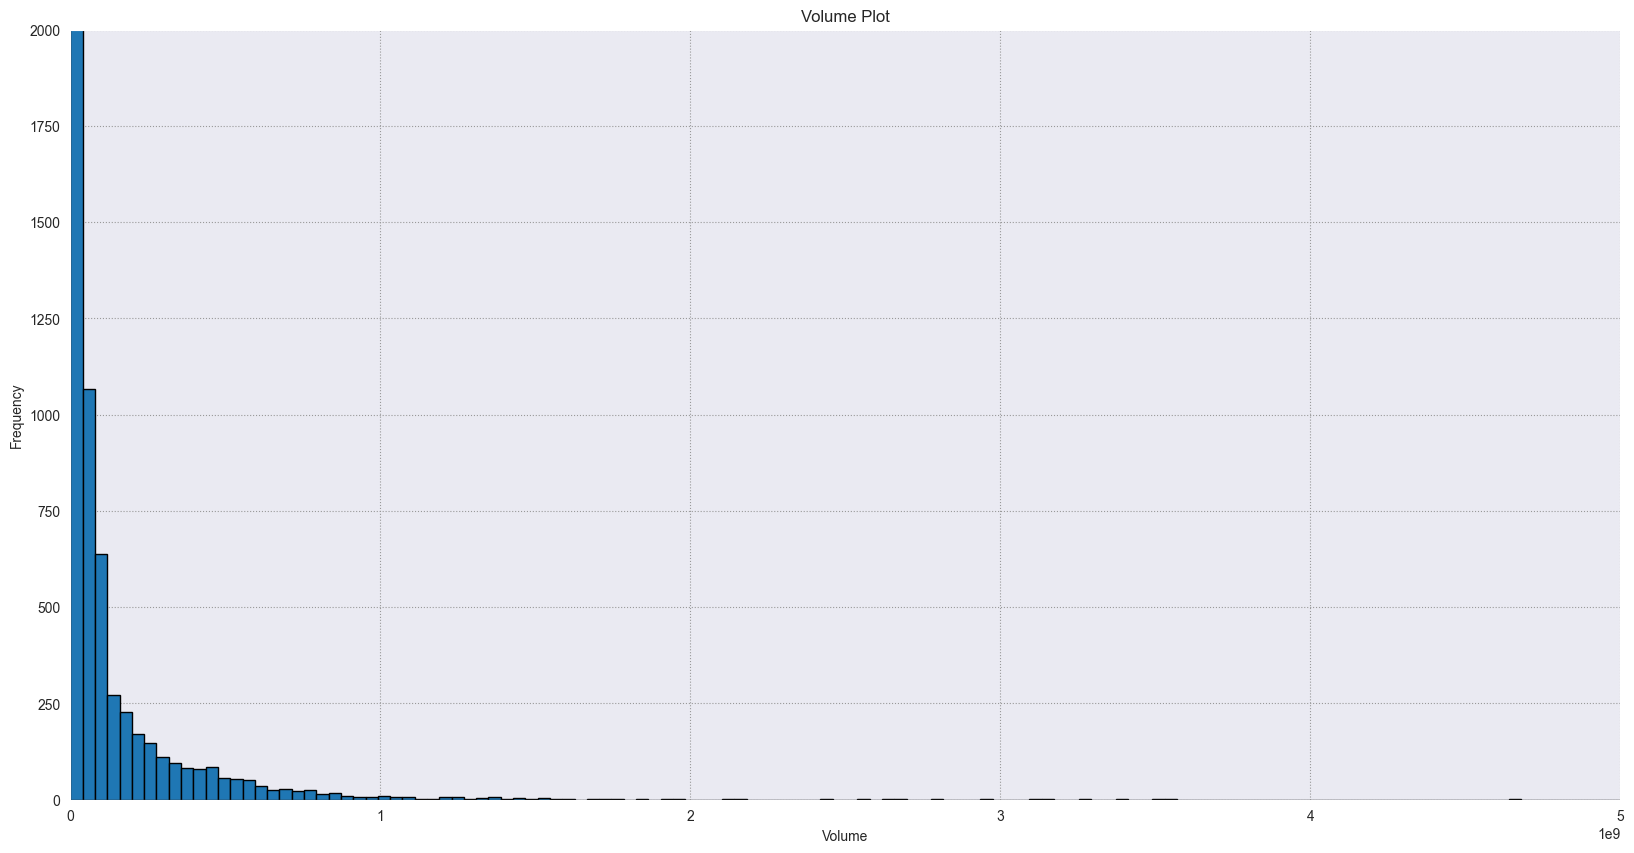

In [30]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(mineableshis['volume'],bins = 3000, edgecolor = "black", align = 'mid')
ax.set_xlim(0,5000000000)
ax.set_ylim(0,2000)
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

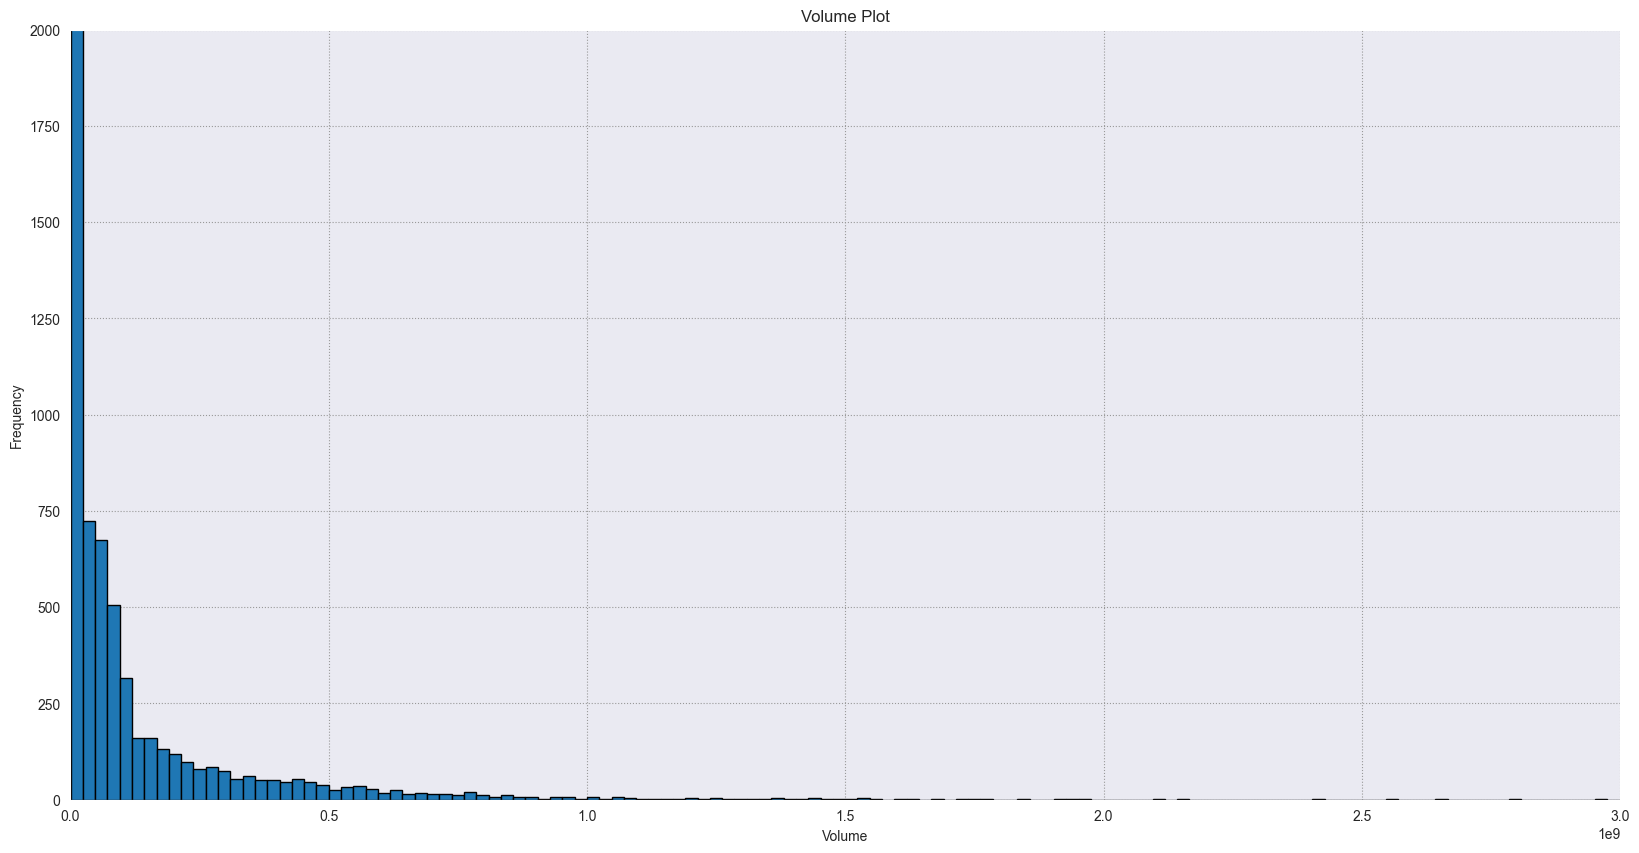

In [31]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(mineableshis['volume'],bins = 5000, edgecolor = "black", align = 'mid')
ax.set_xlim(0,3000000000)
ax.set_ylim(0,2000)
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
۴)ماتریس هم بستگی</font>
</p>

16 top coins marketCap corr matrix

Considering that a corr matrix is always symmetric:

In [32]:
coinhis['Date'] = pd.to_datetime(coinhis['Date'])
df = coinhis.loc[(coinhis['Date'] == '2023-08-31')]
df

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,2.694910e+08,-0.067185,Red,-0.067220,low,1
364,365,Decentraland,2023-08-31,0.305262,0 days 01:46:00,0.306325,0 days 07:22:00,0.291472,0.294341,51834000.0,557215000.0,0.294341,1.893100e+09,-0.010954,Red,-0.010921,low,1
728,729,Bitcoin SV,2023-08-31,32.632200,0 days 01:46:00,33.157800,0 days 01:49:00,31.192000,31.229000,25036200.0,601659000.0,31.229000,1.926610e+07,-1.400170,Red,-1.403200,low,1
1092,1093,Fantom,2023-08-31,0.211612,0 days 01:49:00,0.215447,0 days 03:59:00,0.200656,0.200656,58585500.0,562498000.0,0.200656,2.803300e+09,-0.010947,Red,-0.010956,low,1
1456,1457,Injective,2023-08-31,7.115680,0 days 01:49:00,7.304820,0 days 01:10:00,6.932920,6.992260,30878700.0,585641000.0,6.992260,8.375560e+07,-0.123154,Red,-0.123420,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68510,68511,THORChain,2023-08-31,1.538020,0 days 01:49:00,1.575070,0 days 01:10:00,1.475130,1.499050,45611900.0,510432000.0,1.499050,3.405030e+08,-0.039015,Red,-0.038970,low,1
68874,68875,Neo,2023-08-31,7.394270,0 days 01:46:00,7.420980,0 days 01:16:00,7.014250,7.068070,22764200.0,498573000.0,7.068070,7.053880e+07,-0.326031,Red,-0.326200,low,1
69238,69239,Pax Dollar,2023-08-31,1.000090,0 days 01:48:00,1.001610,0 days 01:10:00,0.991954,0.993349,2093420.0,501811000.0,0.993349,5.051710e+08,-0.006734,Red,-0.006741,low,1
69602,69603,ApeCoin,2023-08-31,1.474280,0 days 02:57:00,1.497290,0 days 01:10:00,1.418550,1.429130,39179300.0,526769000.0,1.429130,3.685940e+08,-0.045130,Red,-0.045150,low,1


In [33]:
df = df.sort_values(['marketCap'], ascending=False).head(16)
l = df.name.to_list()

In [34]:
H=dict()
for i in l:
    c=np.array(coinhis[coinhis['name']==i]['Price change'].values)
    delta=c[1:]-c[:len(c)-1]
    H[i]=delta
data=pd.DataFrame(H)
data

,Bitcoin,Ethereum,Tether USDt,BNB,XRP,USD Coin,Dogecoin,Cardano,Solana,TRON,Toncoin,Dai,Polkadot,Polygon,Litecoin,Shiba Inu
0,941.6,35.15,2.340000e-04,4.150,0.005545,0.000110,0.001499,0.003493,0.1516,-0.002788,-0.03173,0.000242,0.12979,0.007408,2.4758,-3.296000e-08
1,2053.7,102.03,6.720000e-04,11.212,0.028664,-0.000011,0.003512,0.011838,2.1710,0.002660,0.21120,0.000194,0.20379,0.049648,4.5844,3.497700e-07
2,-1608.3,-82.44,-8.970000e-04,-7.780,-0.017405,-0.000196,-0.002692,-0.001047,-1.4538,-0.002084,-0.21195,-0.000117,0.04713,-0.025287,-3.1761,4.629000e-08
3,64.9,16.22,1.860000e-04,1.627,0.000952,0.000105,0.000040,-0.001490,0.7360,0.001217,0.05126,0.000200,-0.12572,0.001804,0.1820,-2.334000e-07
4,-120.2,-17.86,5.700000e-05,-3.956,-0.003108,-0.000088,-0.000521,-0.002613,-0.6187,0.000144,-0.00789,-0.000597,0.02984,-0.005944,-0.4589,-1.290000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-1432.6,-124.49,-8.000000e-05,-30.232,-0.025969,-0.000210,-0.005907,-0.052296,-3.1350,-0.003257,-0.21631,-0.003329,-0.80845,-0.084950,-9.2142,-8.590000e-07
359,803.6,94.79,-4.000000e-05,11.916,0.011921,-0.000216,0.003274,0.031978,1.3946,0.001632,0.22664,0.001499,0.47975,0.049819,5.6157,3.779000e-07
360,330.6,-18.56,-2.220446e-16,3.228,0.000679,0.000228,0.001022,0.026759,0.9115,0.000962,-0.20841,0.000150,0.09311,0.017887,1.2432,7.437000e-07
361,-291.8,-41.08,2.220446e-16,-0.715,-0.003135,0.000010,0.000535,0.003141,-1.1168,0.000122,-0.00899,0.000040,-0.10185,0.012273,-1.6609,-3.838000e-07


<Axes: title={'center': 'Correlation Matrix for DailyPriceChange in top 16 Coins from marketCap view'}>

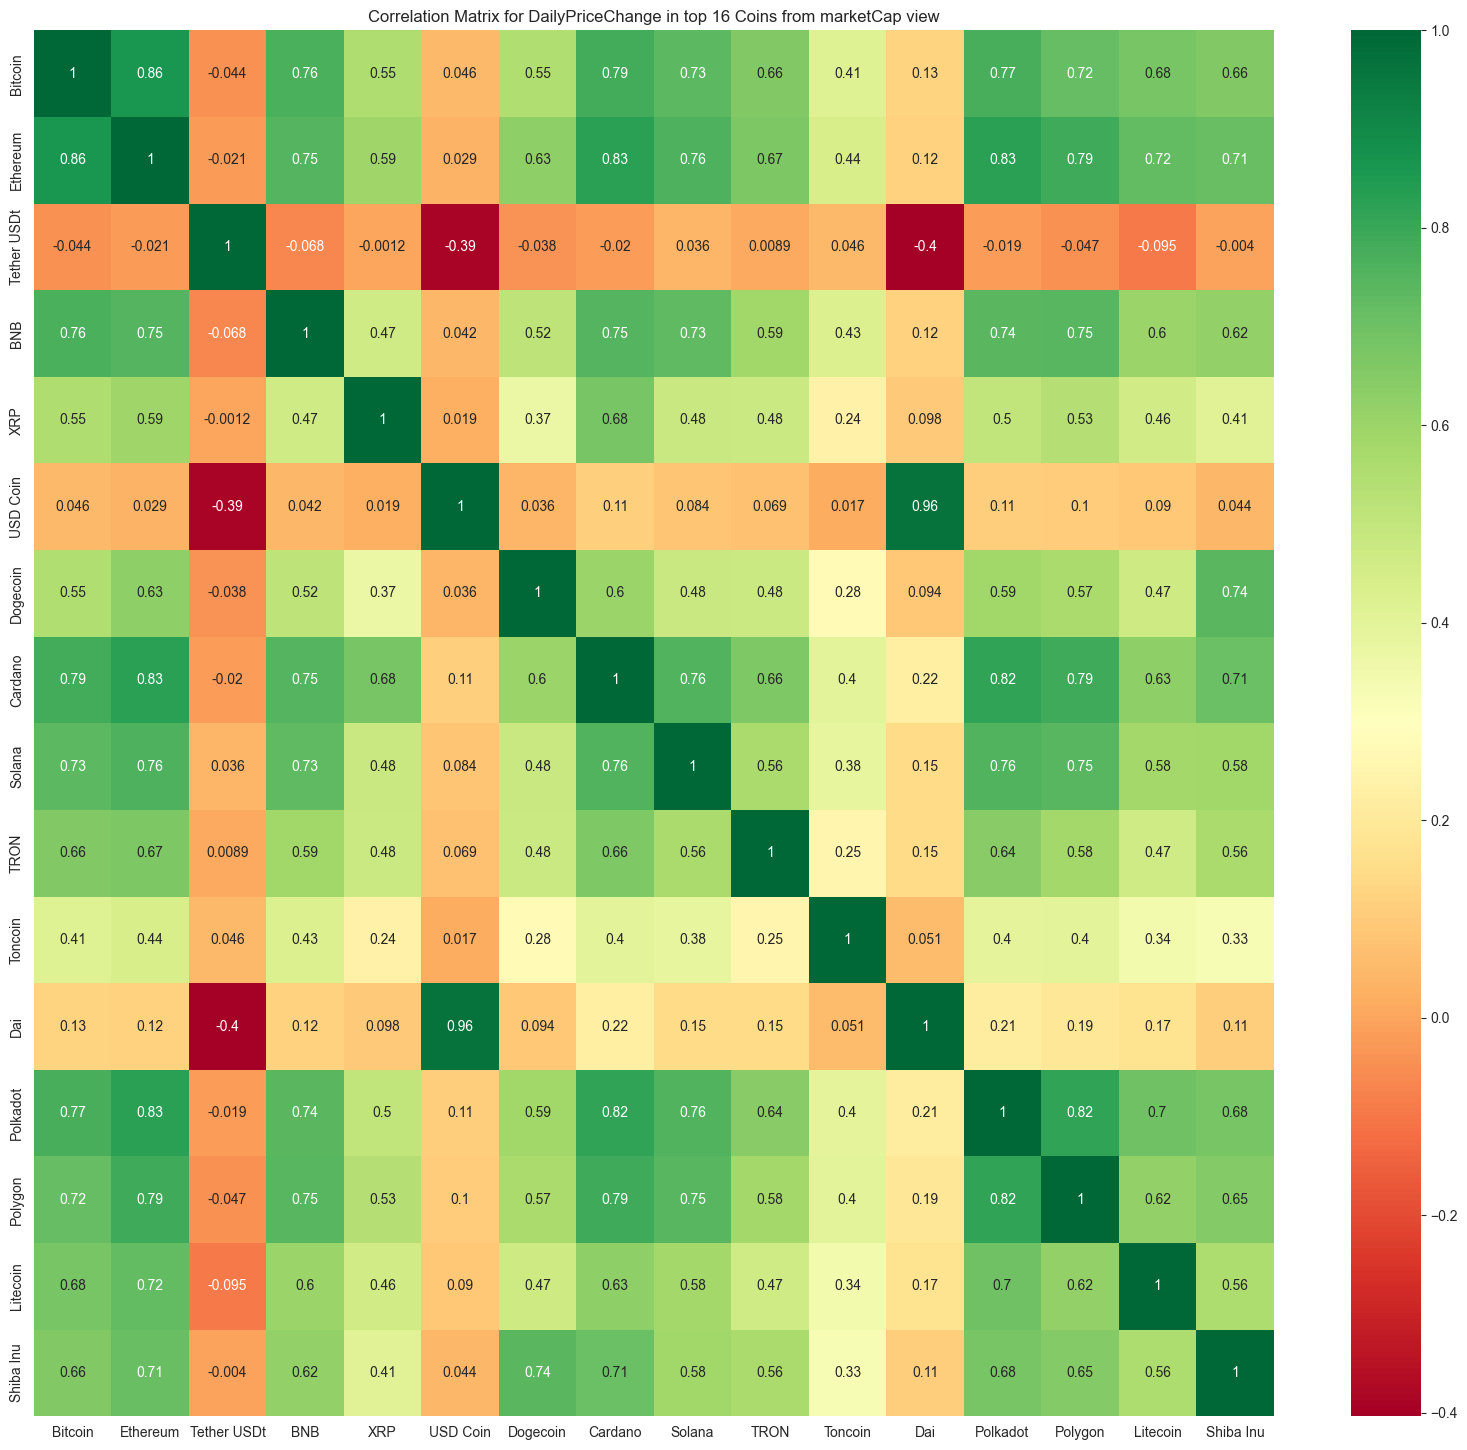

In [35]:
f, AX_1= plt.subplots(figsize=(20,18))
AX_1.set_title('Correlation Matrix for DailyPriceChange in top 16 Coins from marketCap view')
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',ax=AX_1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
۵)بهار سبز و قرمز!</font>
</p>

Filtering spring and plotting!

In [36]:
rg=coinhis[((coinhis['Date'].dt.month==3)|(coinhis['Date'].dt.month==4)|(coinhis['Date'].dt.month==5))][['name','Date','marketCap','Price change']]
rg

,name,Date,marketCap,Price change
92,Synthetix,2023-05-31,605314000.0,-0.07787
93,Synthetix,2023-05-30,625608000.0,-0.00724
94,Synthetix,2023-05-29,627618000.0,-0.08327
95,Synthetix,2023-05-28,649249000.0,0.09127
96,Synthetix,2023-05-27,625420000.0,-0.00325
...,...,...,...,...
70145,Render,2023-03-05,303961000.0,-0.04166
70146,Render,2023-03-04,314285000.0,-0.11861
70147,Render,2023-03-03,344414000.0,-0.17080
70148,Render,2023-03-02,387738000.0,-0.03216


In [37]:
April=list(range(1,31))
May_March=list(range(1,32))
col=[]
for i in [(3,May_March),(4,April),(5,May_March)]:
    for j in i[1]:
        d=rg[(rg['Date'].dt.month==i[0])&(rg['Date'].dt.day==j)]
        n=0.35*len(d)
        if sum(d['Price change']>=0)<n:
            col.extend(rg[(rg['Date']=='2023-{}-{}'.format(i[0],j))&(rg['Price change']>=0)]['name'])
col.sort()
my_dict = {i:col.count(i) for i in col}
v_dict={k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1],reverse=True)}
top10=list(v_dict.keys())[:10]
top10

['USD Coin',
 'Tether USDt',
 'PAX Gold',
 'Tether Gold',
 'Dai',
 'UNUS SED LEO',
 'USDD',
 'MX TOKEN',
 'TrueUSD',
 'Binance USD']

In [38]:
o=rg.groupby('name')['marketCap'].sum()
y=[o[i] for i in top10]

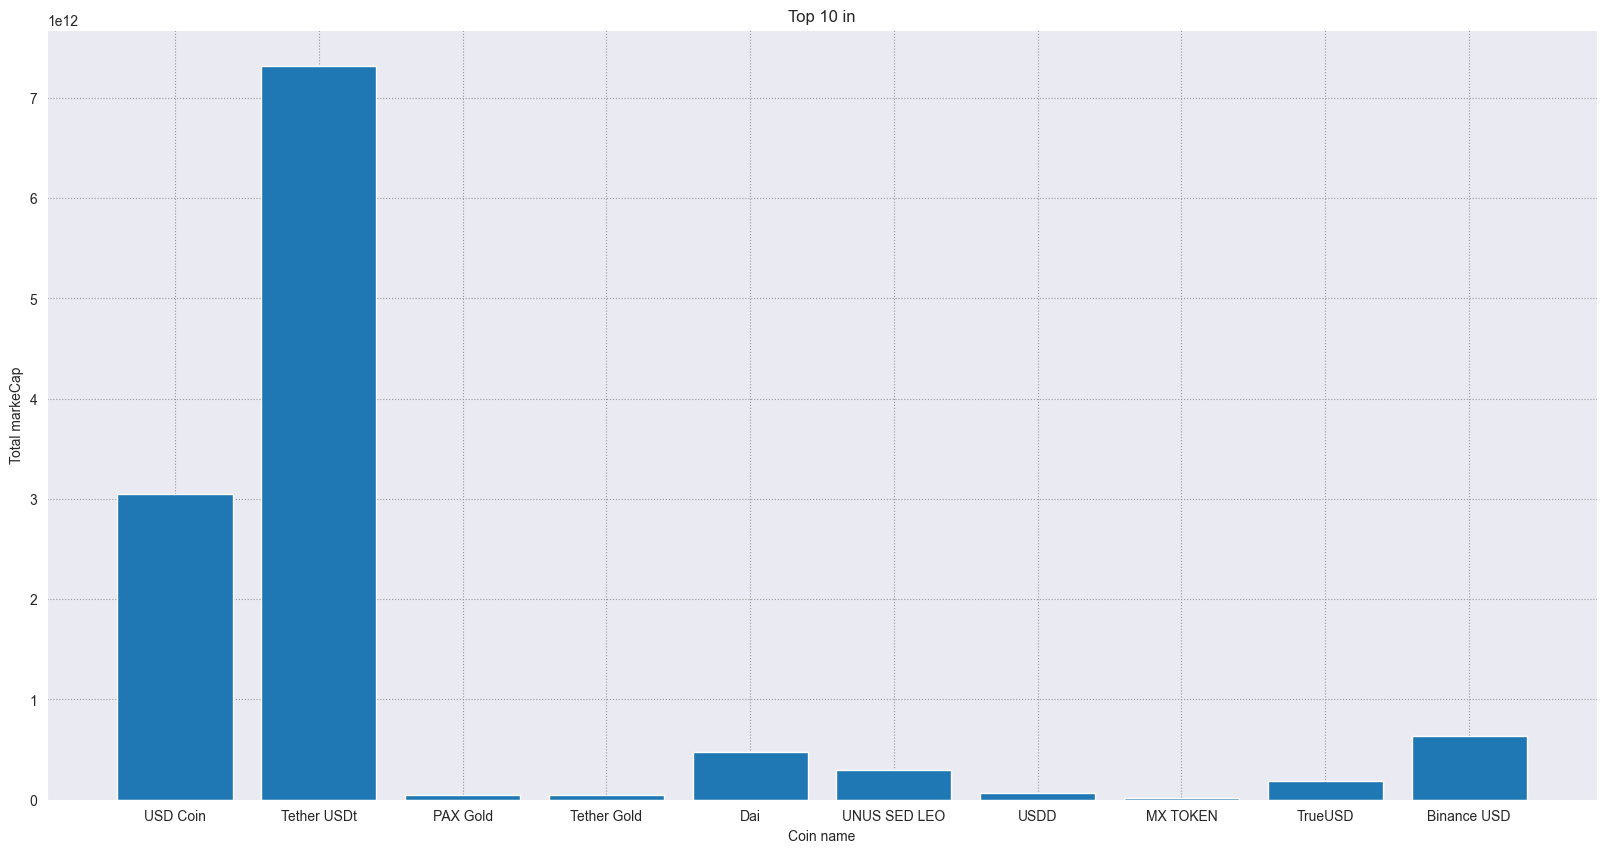

In [39]:
fig , ax = plt.subplots(figsize=(20,10))
ax.bar(top10,y)
ax.set_title('Top 10 in')
ax.set_xlabel('Coin name')
ax.set_ylabel('Total markeCap')
plt.show()

Zooming again!

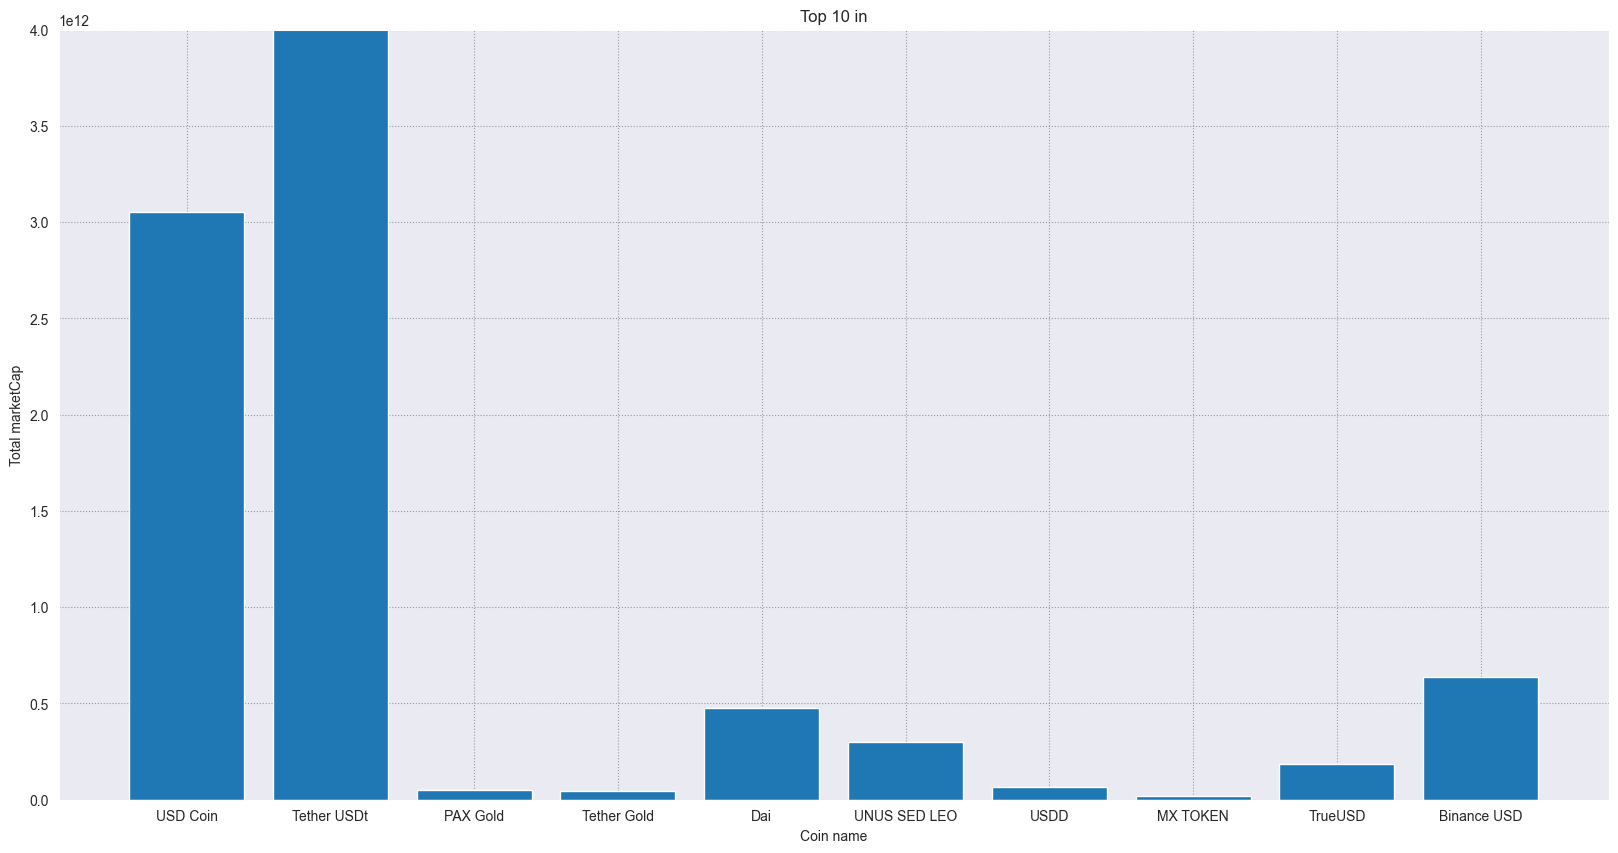

In [40]:
fig , ax = plt.subplots(figsize=(20,10))
ax.bar(top10,y)
ax.set_title('Top 10 in')
ax.set_xlabel('Coin name')
ax.set_ylabel('Total marketCap')
ax.set_ylim(0,4000000000000)
plt.show()

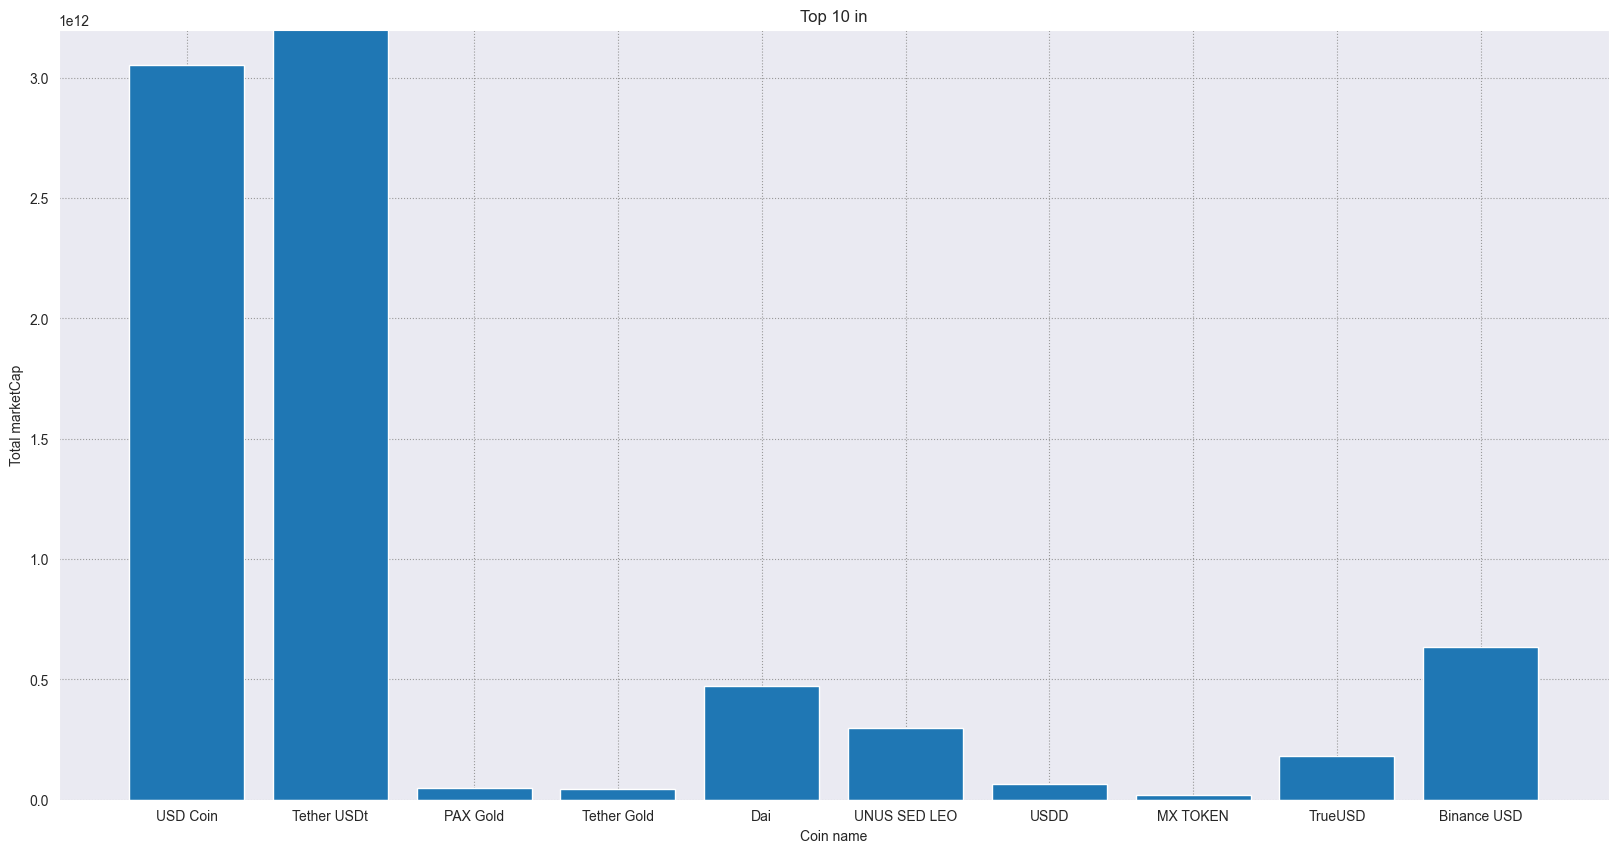

In [41]:
fig , ax = plt.subplots(figsize=(20,10))
ax.bar(top10,y)
ax.set_title('Top 10 in')
ax.set_xlabel('Coin name')
ax.set_ylabel('Total marketCap')
ax.set_ylim(0,3200000000000)
plt.show()

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تخمین
</font>
</h1>

In [42]:
sample=np.random.choice(names,size=40)
sample_mean=[]
sample_std=[]
for i in sample:
    sample_mean.append(np.mean(coinhis[coinhis['name']==i]['volume']))
    sample_std.append(np.std(coinhis[coinhis['name']==i]['volume']))


In [43]:
sample

array(['Optimism', 'Chiliz', 'Mina', 'Casper', 'Solar', 'Qtum', 'Solar',
       'Aragon', 'Nexo', 'Kyber Network Crystal v2', 'Horizen', 'Aptos',
       'TRON', 'DigiByte', '0x Protocol', 'Ocean Protocol', 'XDC Network',
       'Cronos', 'Render', 'Fetch.ai', 'Stargate Finance', 'Blur',
       'Solana', 'Basic Attention Token', 'Trust Wallet Token', 'Maker',
       'USD Coin', 'ApeCoin', 'Litecoin', 'Blur', 'Livepeer',
       'Tether USDt', 'Immutable', 'Storj', 'Decentraland', 'USDD',
       'JUST', 'Amp', 'Axie Infinity', 'Gala'], dtype='<U24')

In [44]:
lower=[]
upper=[]
for i,j in enumerate(sample):
    t_score = sp.stats.t.ppf((1 + 0.98) / 2, df=sum(coinhis['name']==j)- 1)
    margin_of_error = t_score * (sample_std[i] / np.sqrt(sum(coinhis['name']==j)))
    lower.append( sample_mean[i] - margin_of_error)
    upper.append (sample_mean[i] + margin_of_error)

In [45]:
for i,j in enumerate(sample):
    print(j,'will be in (',lower[i],',',upper[i],') with 98 percents confidence')

Optimism will be in ( 148038236.3480833 , 181638190.57499364 ) with 98 percents confidence
Chiliz will be in ( 137778902.45906717 , 193613722.8156581 ) with 98 percents confidence
Mina will be in ( 22973296.41388552 , 33159193.53116943 ) with 98 percents confidence
Casper will be in ( 7934559.8906222815 , 9948075.548938159 ) with 98 percents confidence
Solar will be in ( 31109904.559902135 , 63350548.07746051 ) with 98 percents confidence
Qtum will be in ( 38029651.33816181 , 45587581.07942061 ) with 98 percents confidence
Solar will be in ( 31109904.559902135 , 63350548.07746051 ) with 98 percents confidence
Aragon will be in ( 11515571.790383967 , 14025713.209616033 ) with 98 percents confidence
Nexo will be in ( 5821821.9053801 , 7107688.31440012 ) with 98 percents confidence
Kyber Network Crystal v2 will be in ( 23869065.365443077 , 34185058.205985494 ) with 98 percents confidence
Horizen will be in ( 10017192.541914297 , 14990839.76577801 ) with 98 percents confidence
Aptos will b

In [86]:
# Just for some reassurance!
cr = coinhis[coinhis['name'] == 'Chiliz']
cr['volume'].mean(), sp.stats.norm.interval(0.98, cr['volume'].mean(), cr['volume'].std()/np.sqrt(364))

(165696312.63736263, (137863901.4735142, 193528723.80121106))

In [47]:
sample_mean = np.array(sample_mean)

In [48]:
sample_mean.mean(), sample_mean.std()

(1009858197.0998962, 5186800854.680004)

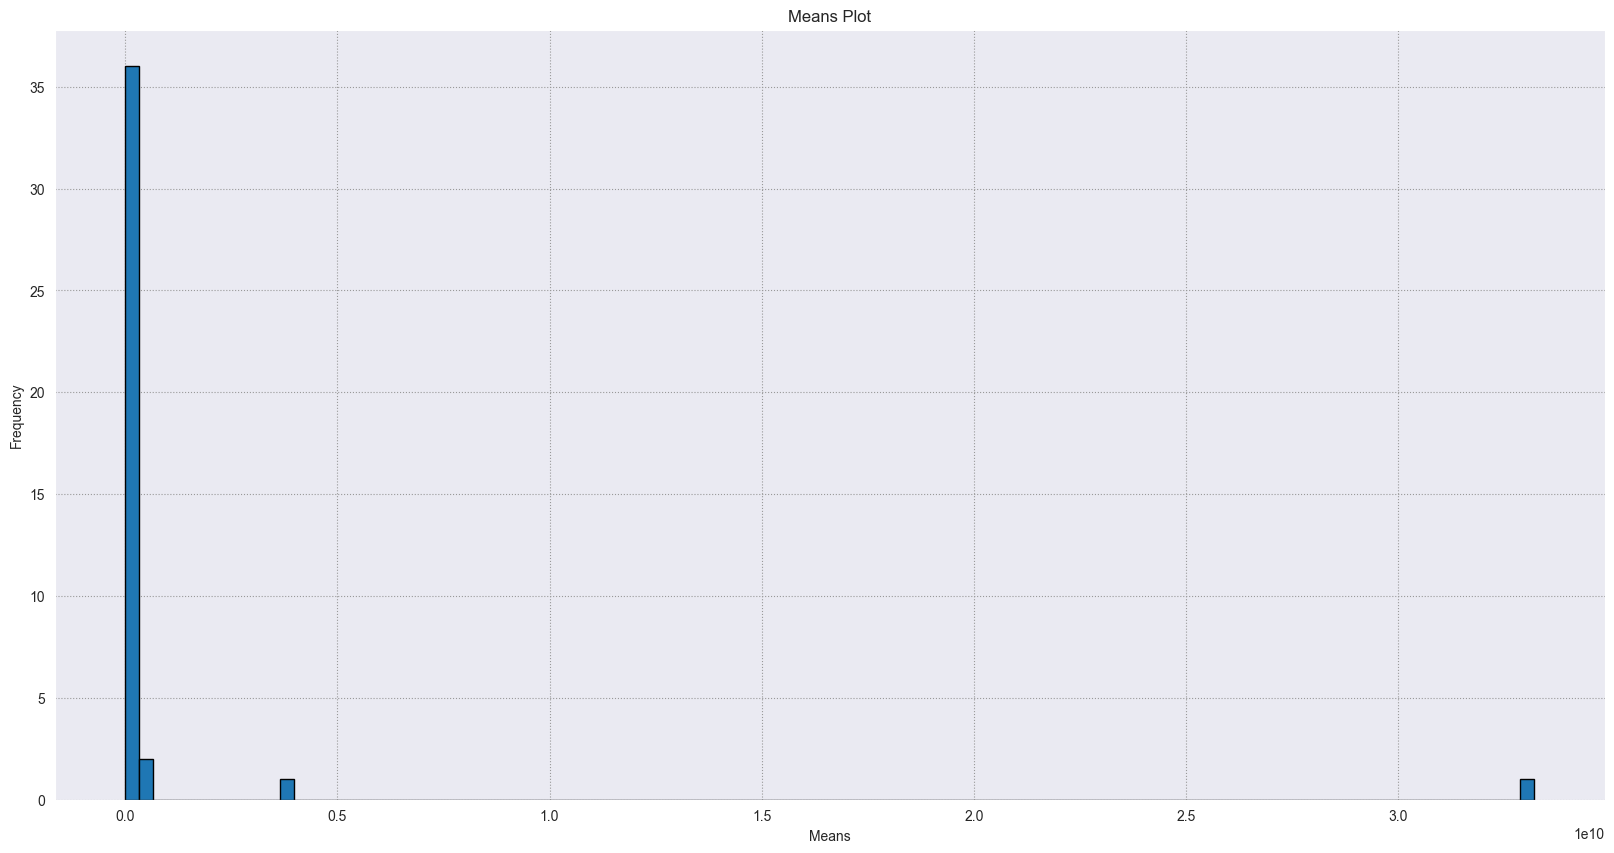

In [49]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(sample_mean,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Means Plot')
ax.set_xlabel('Means')
ax.set_ylabel('Frequency')
plt.show()

They are not normally distributed!

For conducting a CI we will try to make our data normal using boxcox transformation!

In [50]:
b, lmbda = sp.stats.boxcox(sample_mean)
b

array([4.22402004, 4.22408213, 4.19777461, 4.1740289 , 4.20664683,
       4.20466412, 4.20664683, 4.18212074, 4.16605709, 4.19838166,
       4.18166034, 4.23118133, 4.22969001, 4.15402484, 4.19404196,
       4.19754233, 4.15737089, 4.19317989, 4.21315159, 4.20819114,
       4.19651448, 4.21742355, 4.23785975, 4.19897128, 4.20119365,
       4.20632111, 4.25042077, 4.2214735 , 4.23725182, 4.21742355,
       4.18270823, 4.26038833, 4.19850066, 4.19680305, 4.21846146,
       4.2012133 , 4.1981175 , 4.17504542, 4.21513583, 4.2221738 ])

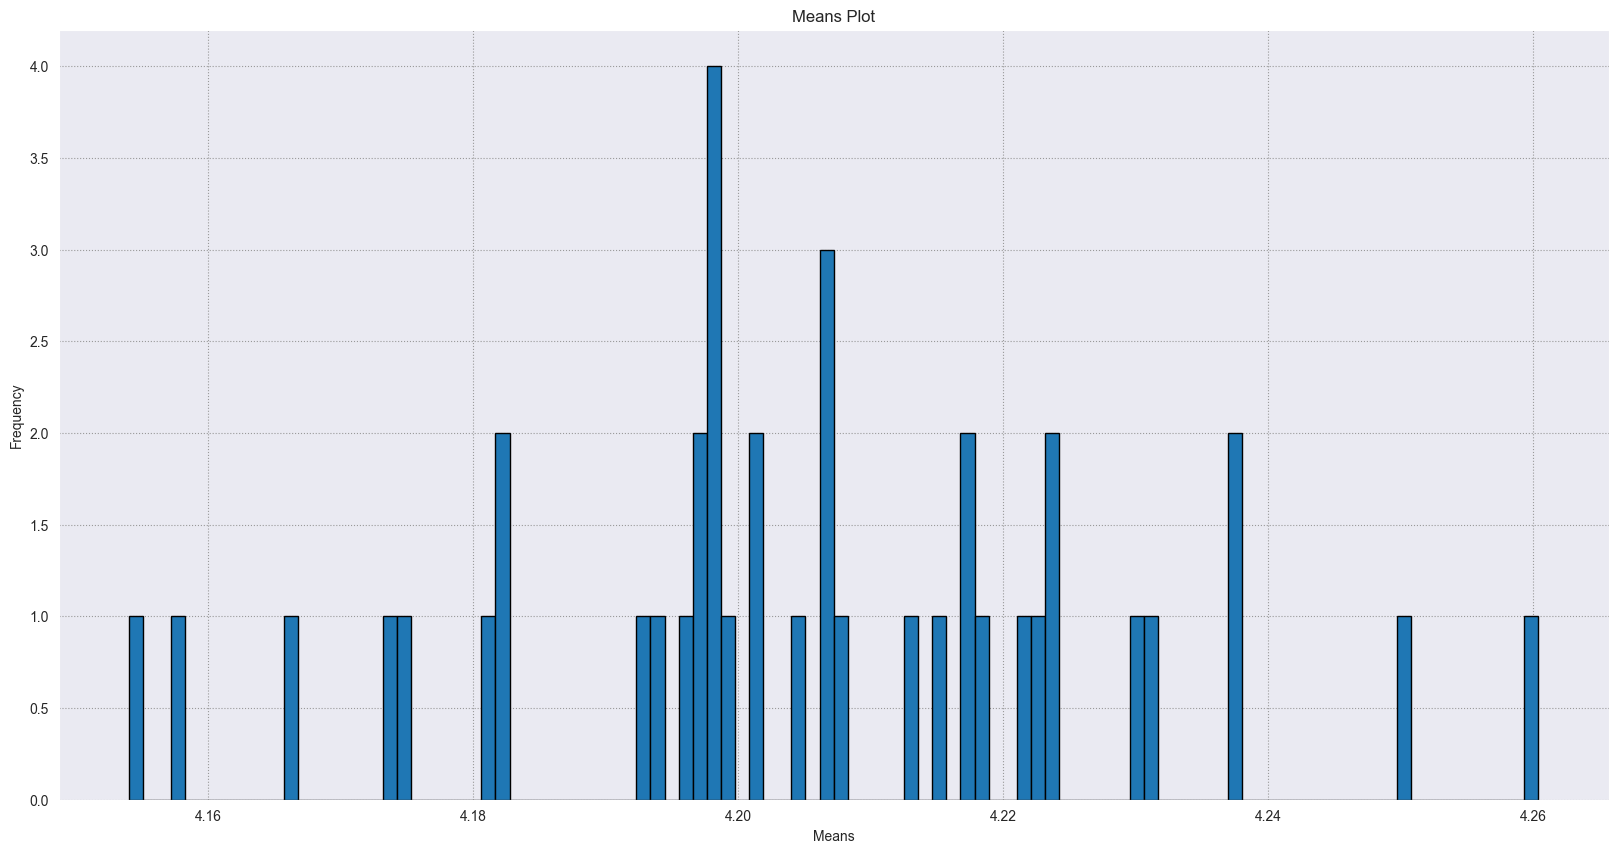

In [51]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(b,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Means Plot')
ax.set_xlabel('Means')
ax.set_ylabel('Frequency')
plt.show()

Testing normality:

In [52]:
from scipy.stats import shapiro
stat, p = shapiro(b)
p

0.8353573679924011

We can confidently say that our transformed data is normal!

In [53]:
b

array([4.22402004, 4.22408213, 4.19777461, 4.1740289 , 4.20664683,
       4.20466412, 4.20664683, 4.18212074, 4.16605709, 4.19838166,
       4.18166034, 4.23118133, 4.22969001, 4.15402484, 4.19404196,
       4.19754233, 4.15737089, 4.19317989, 4.21315159, 4.20819114,
       4.19651448, 4.21742355, 4.23785975, 4.19897128, 4.20119365,
       4.20632111, 4.25042077, 4.2214735 , 4.23725182, 4.21742355,
       4.18270823, 4.26038833, 4.19850066, 4.19680305, 4.21846146,
       4.2012133 , 4.1981175 , 4.17504542, 4.21513583, 4.2221738 ])

In [54]:
interval = sp.stats.norm.interval(0.98, loc = b.mean(), scale = b.std())
interval

(4.1516112724789735, 4.258281642547811)

98% of our data in a transformed way must be in the given interval!

We can say, to calculate a confidence interval of 98% we should transform our data to a normal one.

Then we will use the transformed data to calculate the interval and given the current data, our interval would be as shown.

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض
</font>
</h1>

Hypothesis Test One

In [55]:
coinhis['weekday'] = coinhis['Date'].dt.day_name()
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1,Thursday
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380,low,1,Wednesday
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1,Tuesday
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1,Monday
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1,Tuesday
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1,Monday
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low,1,Sunday
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1,Saturday


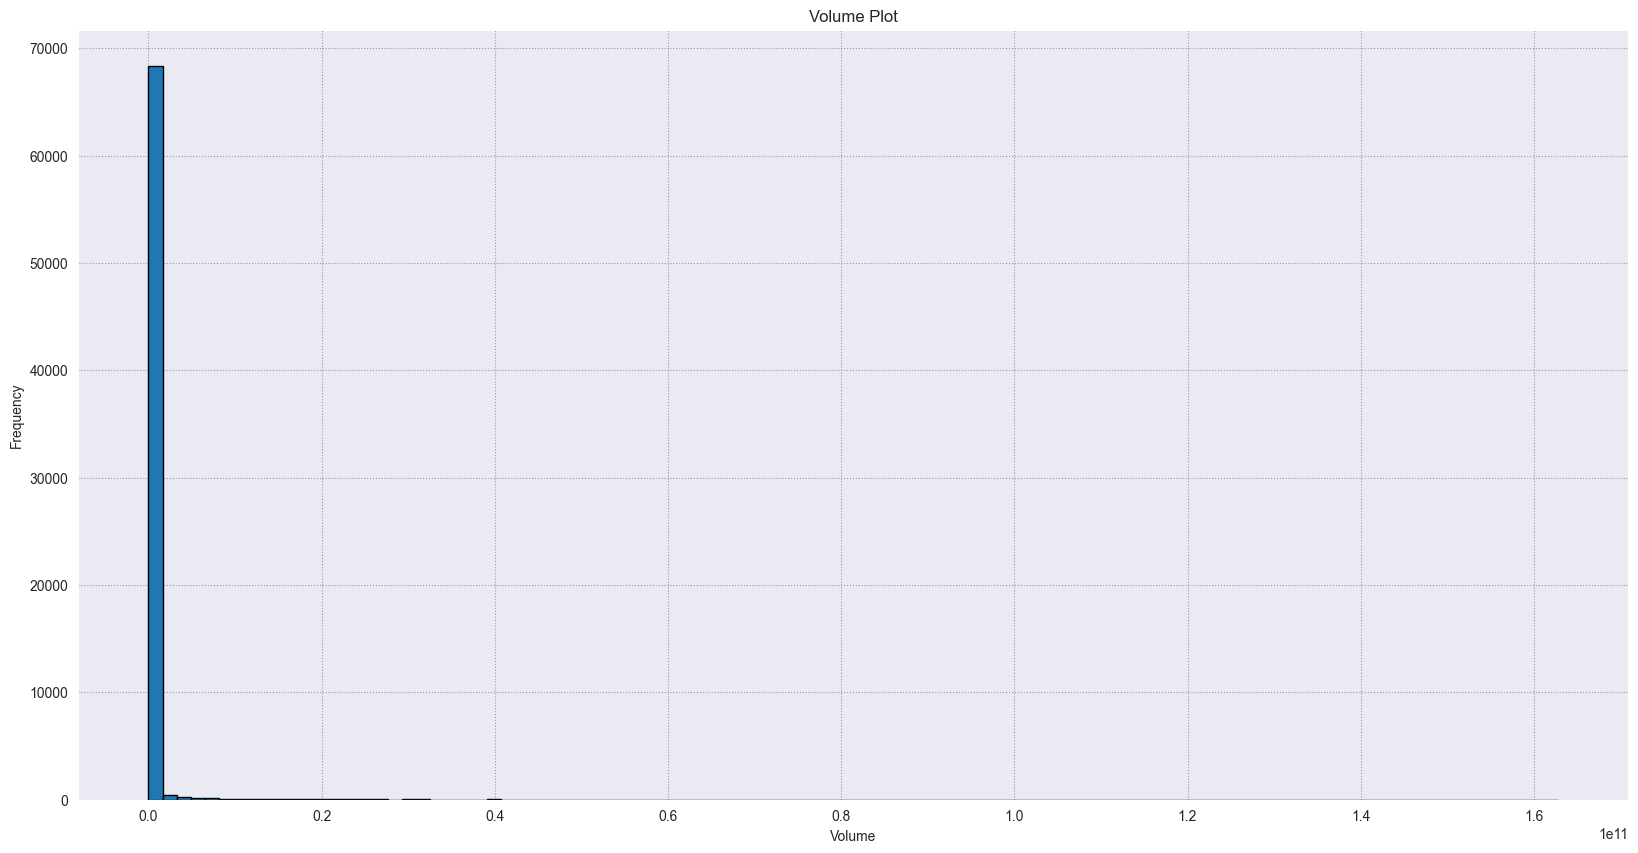

In [56]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(coinhis['volume'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

Volume is not normal therefore no T-test!

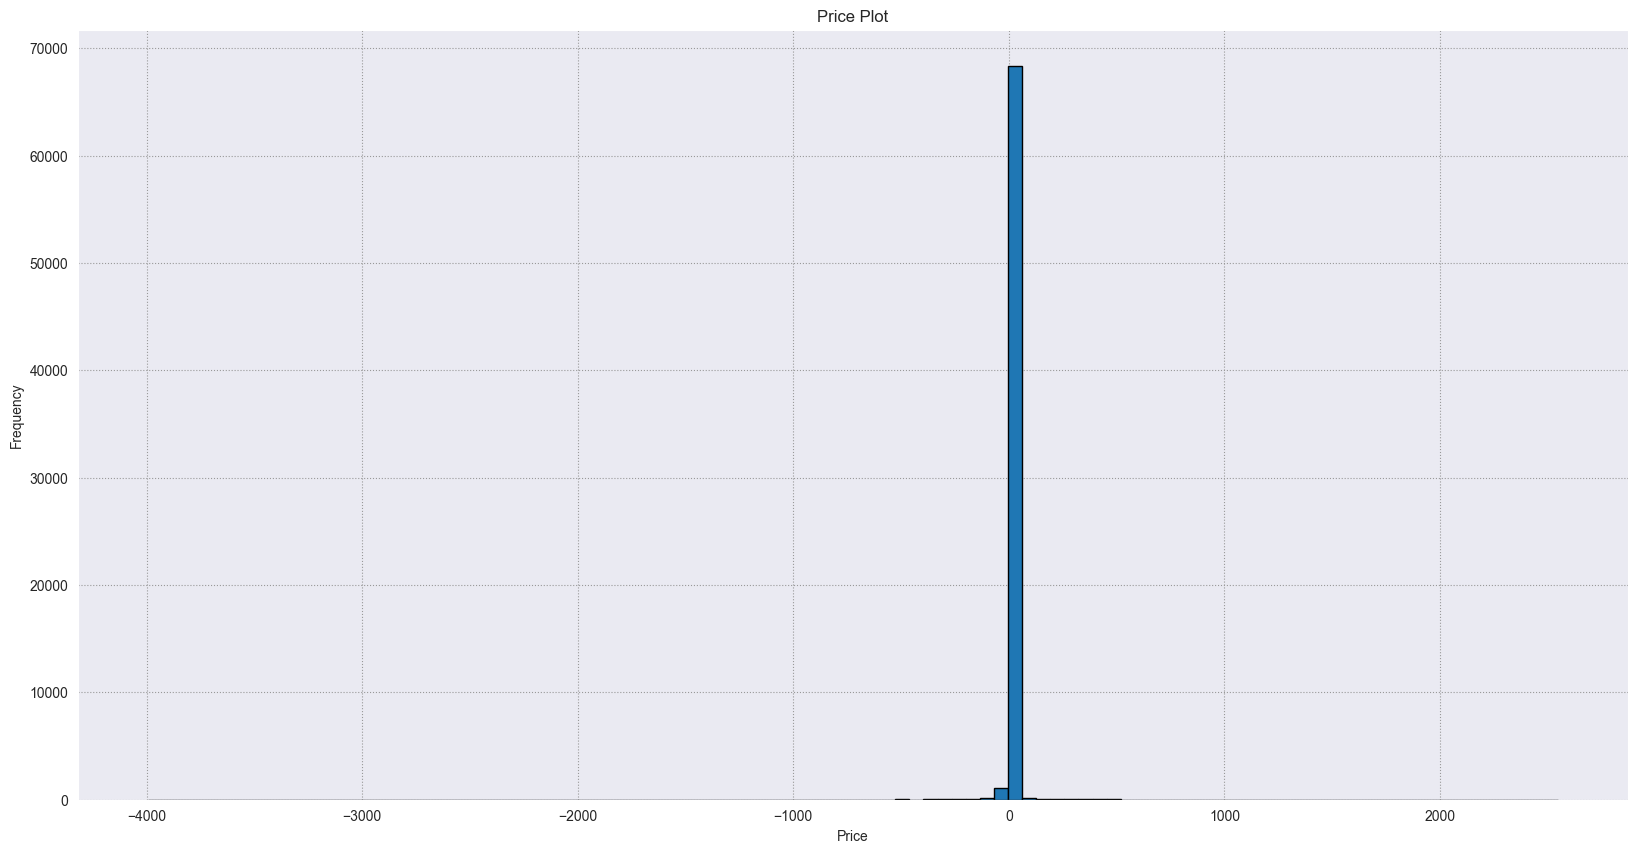

In [57]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(coinhis['Price change'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [58]:
sp.stats.kurtosis(coinhis['Price change'], bias=True)

650.0719878094325

The 3+ kurtosis states that our data is not normal and it's a leptokurtic distributed data, but due to being normal-like, T-testing would be available.

In [59]:
from scipy.stats import shapiro
stat, p = shapiro(coinhis['Price change'])
p

c:\Users\ROG\anaconda3\envs\MLB\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

There is no way that this is a normally distributed data!

In [60]:
weekends = coinhis[(coinhis['weekday']=='Thursday') | (coinhis['weekday']=='Friday') | (coinhis['weekday']=='Saturday')]
weekends

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1,Thursday
5,6,Synthetix,2023-08-26,2.062420,0 days 05:06:00,2.082830,0 days 00:55:00,2.052110,2.071590,14078800.0,557510000.0,2.071590,269121000.0,0.009235,Green,0.009170,low,1,Saturday
6,7,Synthetix,2023-08-25,2.074430,0 days 00:22:00,2.075320,0 days 07:49:00,2.020170,2.062360,32694900.0,555025000.0,2.062360,269121000.0,-0.012086,Red,-0.012070,low,1,Friday
7,8,Synthetix,2023-08-24,2.138410,0 days 07:25:00,2.147890,0 days 01:00:00,2.046850,2.074440,26242400.0,558277000.0,2.074440,269121000.0,-0.063833,Red,-0.063970,low,1,Thursday
12,13,Synthetix,2023-08-19,2.181630,0 days 07:06:00,2.245450,0 days 07:12:00,2.171880,2.240550,17961000.0,602595000.0,2.240550,268950000.0,0.059076,Green,0.058920,low,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70321,70322,Render,2022-09-10,0.564239,0 days 08:04:00,0.627566,0 days 01:09:00,0.560060,0.582239,24590000.0,147772000.0,0.582239,253799000.0,0.017970,Green,0.018000,low,1,Saturday
70322,70323,Render,2022-09-09,0.550511,0 days 02:43:00,0.569030,0 days 07:44:00,0.535818,0.564269,19865800.0,143211000.0,0.564269,253799000.0,0.013396,Green,0.013758,low,1,Friday
70323,70324,Render,2022-09-08,0.507117,0 days 08:05:00,0.622047,0 days 03:13:00,0.491250,0.550873,44263500.0,139811000.0,0.550873,253799000.0,0.043774,Green,0.043756,low,1,Thursday
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1,Saturday


In [61]:
weekdays = coinhis[(coinhis['weekday']=='Sunday') | (coinhis['weekday']=='Monday') | (coinhis['weekday']=='Tuesday')]
weekdays

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1,Tuesday
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1,Monday
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday
9,10,Synthetix,2023-08-22,2.094780,0 days 06:59:00,2.114860,0 days 01:41:00,2.009590,2.067720,24249200.0,556154000.0,2.067720,268970000.0,-0.027208,Red,-0.027060,low,1,Tuesday
10,11,Synthetix,2023-08-21,2.149070,0 days 03:09:00,2.150930,0 days 01:13:00,2.084880,2.094920,29950200.0,563439000.0,2.094920,268955000.0,-0.054175,Red,-0.054150,low,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70319,70320,Render,2022-09-12,0.563672,0 days 04:08:00,0.583103,0 days 03:46:00,0.540043,0.569006,12824700.0,144413000.0,0.569006,253799000.0,0.005365,Green,0.005334,low,1,Monday
70320,70321,Render,2022-09-11,0.582062,0 days 01:13:00,0.600198,0 days 02:01:00,0.553060,0.563641,13357200.0,143051000.0,0.563641,253799000.0,-0.018599,Red,-0.018421,low,1,Sunday
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1,Tuesday
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1,Monday


Dynamism of a market is a factor of its inner daily changes or its volume in every time portion

We will test each interpretation.

Price change and Volume will be tested using a manwhitney U-test and boxcox transformation if needed.

Prices:

Floodgate through equality

x: weekends

y: weekdays

H0 : μx = μy

H1 : μx != μy 

In [62]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(weekends['Price change'], weekdays['Price change'])
p_value

0.9030782775772508

Confidentally we can say that week days and price changes are independant and therefore there is no significant relation between them.

Volumes:

Floodgate through equality

x: weekends

y: weekdays

H0 : μx = μy

H1 : μx != μy

In [63]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(weekends['volume'], weekdays['volume'])
p_value

0.7034366803570782

Using manwhitney U-test we can assume that week day has no direct effect on market's volume.

Hence, volume and price change has no values of induction and we can say using volume or price change, weekdays and weekends won't differ significantly in dynamicity.

We will try to make the data normal by IQR method.

In [64]:
Q1 = coinhis['Price change'].quantile(0.25)
Q3 = coinhis['Price change'].quantile(0.75)
IQR = Q3 - Q1
m = coinhis['Price change']
m = m[(m <= Q3 + IQR*1.5) & (m >= Q1 - IQR*1.5)]
m

2       -0.019980
3       -0.026910
4        0.036480
5        0.009170
6       -0.012070
           ...   
70325   -0.030350
70326   -0.016294
70327    0.007214
70328   -0.011099
70329   -0.002837
Name: Price change, Length: 47520, dtype: float64

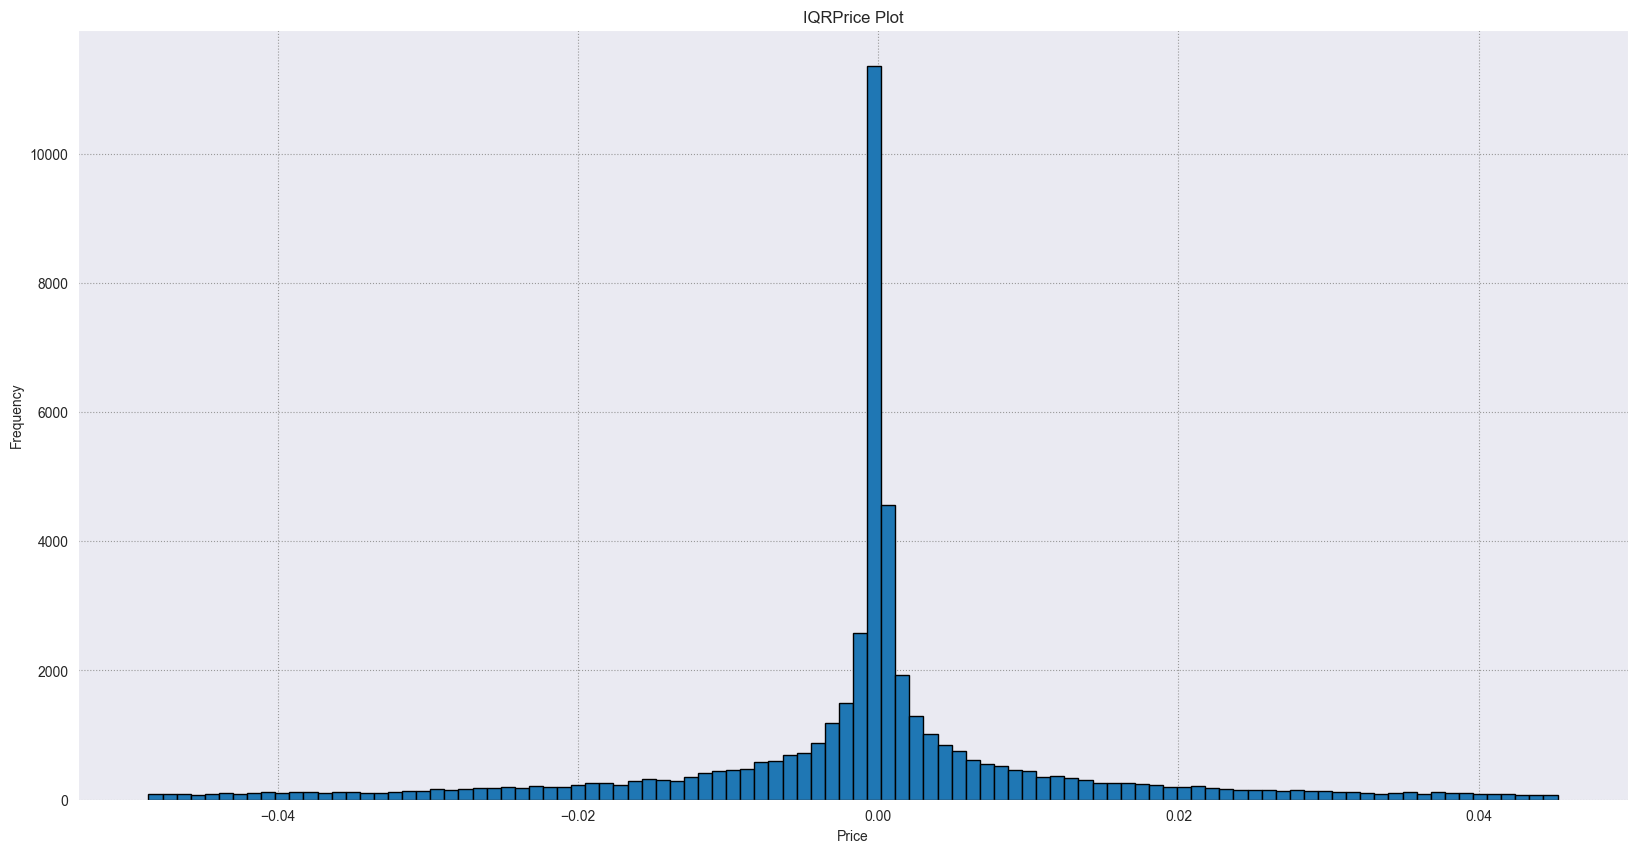

In [65]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(m,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('IQRPrice Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [66]:
from scipy.stats import shapiro
stat, p = shapiro(m)
p

c:\Users\ROG\anaconda3\envs\MLB\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

Still not normal!

Trying Yeo-Johnson transformation

In [67]:
y = sp.stats.yeojohnson(m)
y

(array([-0.01946688, -0.02598678,  0.03826699, ...,  0.00728278,
        -0.01093897, -0.00282644]),
 3.633023372476427)

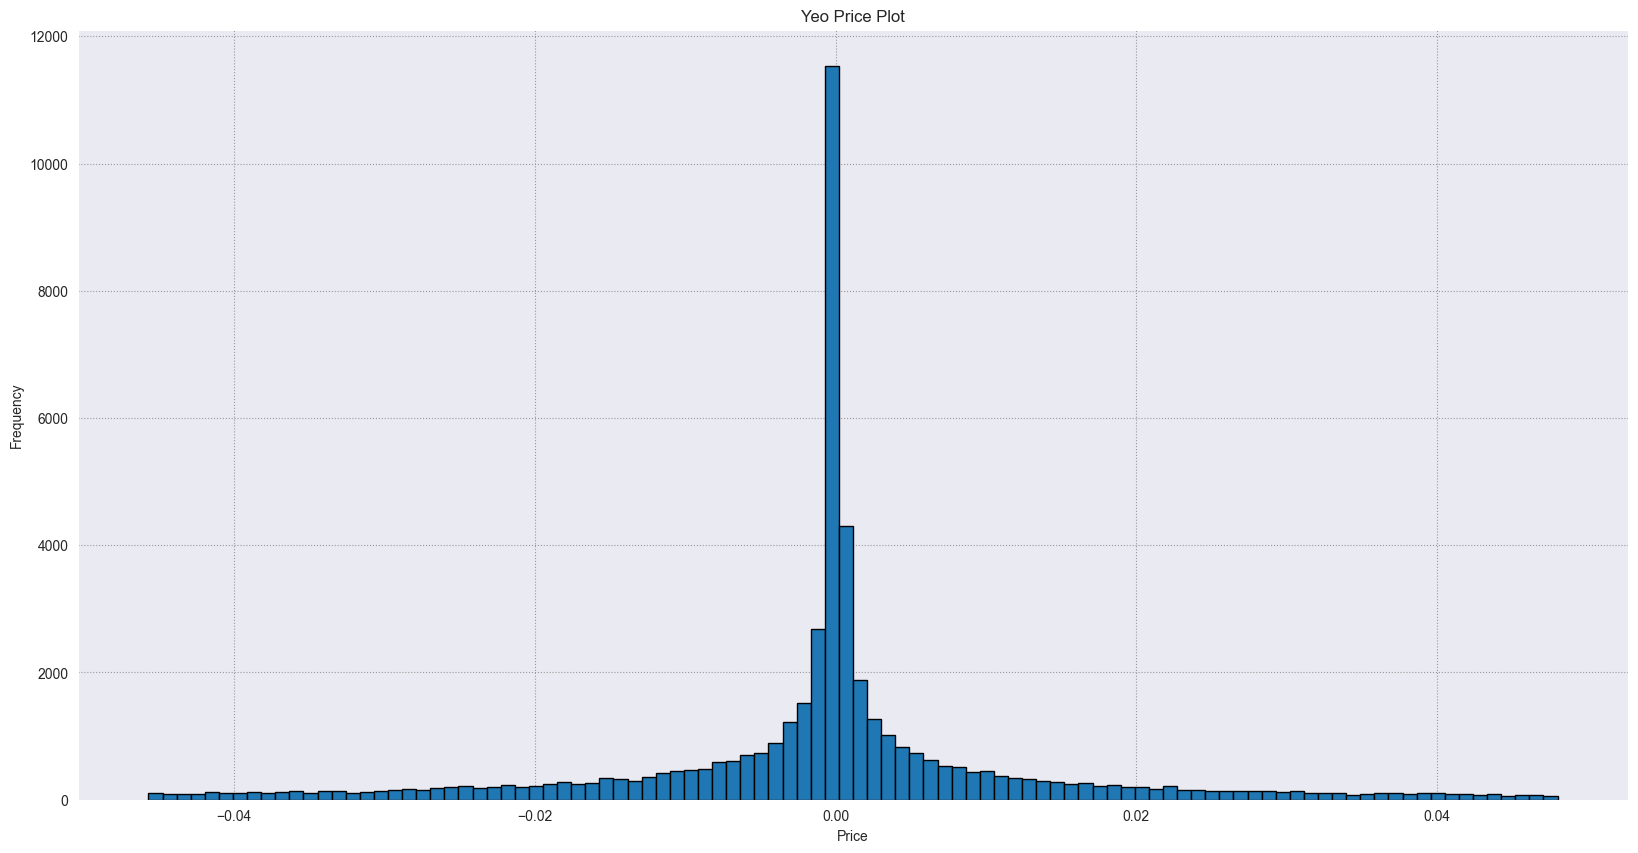

In [68]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(y[0],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Yeo Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [69]:
from scipy.stats import shapiro
stat, p = shapiro(y[0])
p

0.0

It won't be normal any way!

Any of the transformations didn't help us to make our data normal!

Hypothesis Test Two

In [70]:
Group1 = coinhis[(coinhis['name']=='Bitcoin')|(coinhis['name']=='Ethereum')|(coinhis['name']=='Tether USDt')]['volume']
Group1

19817    2.730240e+10
19818    2.271870e+10
19819    3.925720e+10
19820    1.816020e+10
19821    1.207260e+10
             ...     
20904    4.340400e+10
20905    2.881350e+10
20906    2.524590e+10
20907    2.361310e+10
20908    2.912400e+10
Name: volume, Length: 1092, dtype: float64

In [71]:
Group2 = coinhis[(coinhis['name']!='Bitcoin')&(coinhis['name']!='Ethereum')&(coinhis['name']!='Tether USDt')]['volume']
Group2

0        43897700.0
1        31366400.0
2        45715400.0
3        23323500.0
4        21101900.0
            ...    
70325     9924320.0
70326    10377500.0
70327     4796500.0
70328     4426980.0
70329     9301720.0
Name: volume, Length: 69238, dtype: float64

We know that volume has a non-normal distribution therefore a U-test is needed

Floodgate through equality

x: BTC, ETH, USDT

y: Others

H0 : μx = μy

H1 : μx != μy

It must be considered that a U-test only talks about having a relation not the state of it.

In [72]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(Group1, Group2)
p_value

0.0

Using the U-test it is stated that coins group has direct effect on their volume.

For the state of relation we will use boxcox transformation and T-test afterwards

In [73]:
dfx, lmbda = sp.stats.boxcox(coinhis['volume'])
coinhis = pd.concat([coinhis,pd.DataFrame(dfx)], axis =1)
coinhis = coinhis.rename(columns={0:'BC'})
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday,BC
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1,Thursday,7.550515
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380,low,1,Wednesday,7.505149
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1,Tuesday,7.555873
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1,Monday,7.463682
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday,7.449351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1,Tuesday,7.335872
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1,Monday,7.342866
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low,1,Sunday,7.216780
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1,Saturday,7.203030


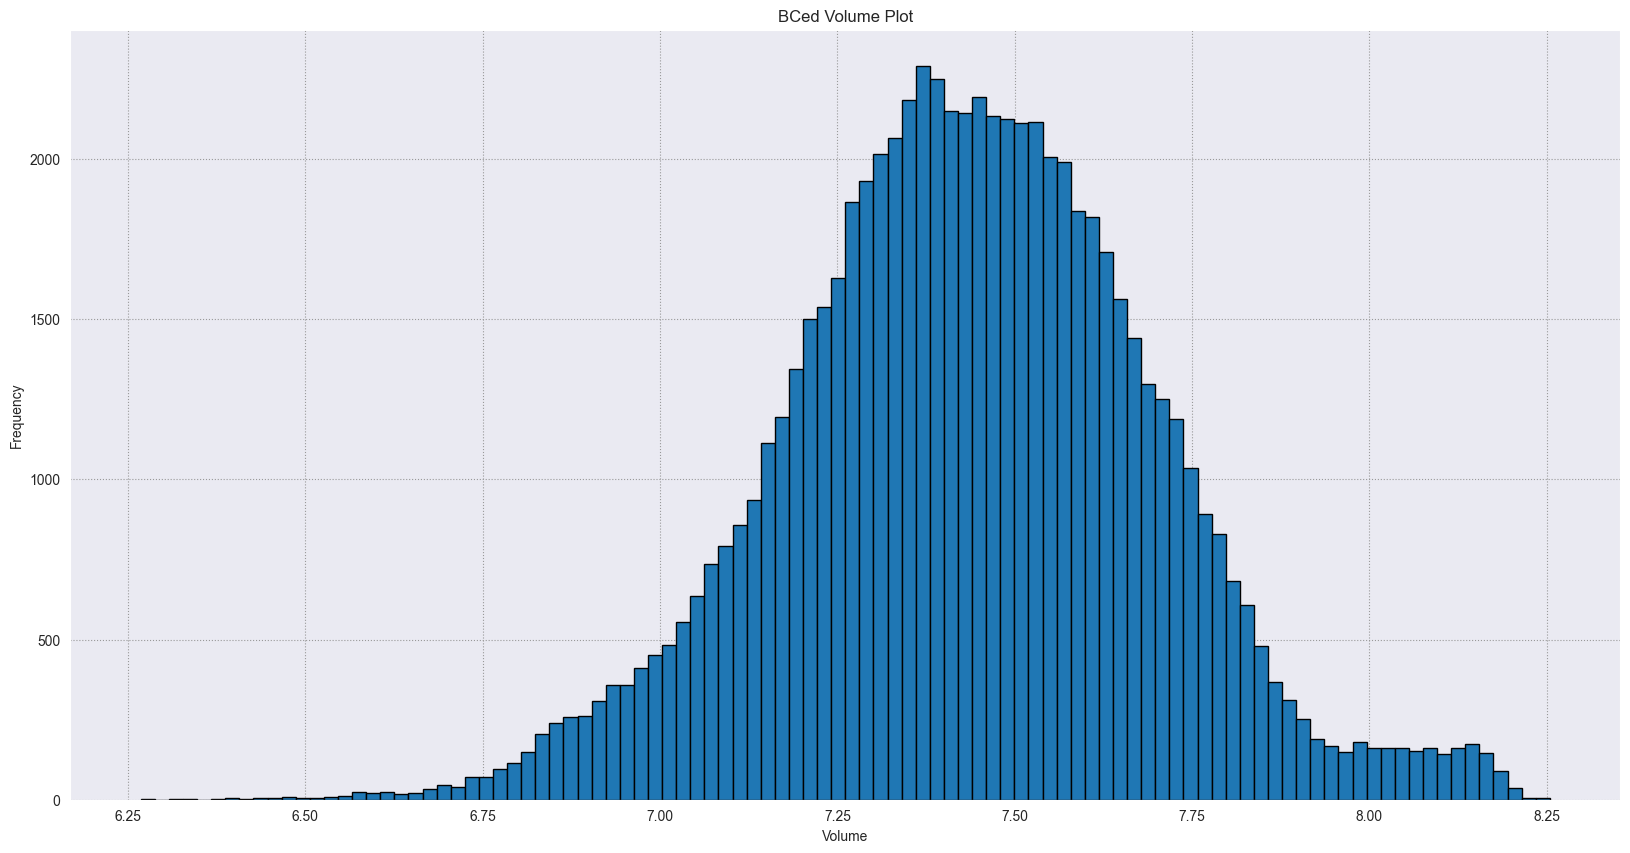

In [74]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(dfx,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('BCed Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

As it shows, our new volume column is a semi-normal one; allowing us to use T-tests!

In [75]:
Group1x = coinhis[(coinhis['name']=='Bitcoin')|(coinhis['name']=='Ethereum')|(coinhis['name']=='Tether USDt')]['BC']
Group1x

19817    8.152447
19818    8.140707
19819    8.174930
19820    8.126061
19821    8.098370
           ...   
20904    8.180983
20905    8.155842
20906    8.147475
20907    8.143194
20908    8.156515
Name: BC, Length: 1092, dtype: float64

In [76]:
Group2x = coinhis[(coinhis['name']!='Bitcoin')&(coinhis['name']!='Ethereum')&(coinhis['name']!='Tether USDt')]['BC']
Group2x

0        7.550515
1        7.505149
2        7.555873
3        7.463682
4        7.449351
           ...   
70325    7.335872
70326    7.342866
70327    7.216780
70328    7.203030
70329    7.325659
Name: BC, Length: 69238, dtype: float64

Because of different sample sizes we will use a Welch's T-test.

In [77]:
sp.stats.ttest_ind(Group1x, Group2x, equal_var = False)

TtestResult(statistic=386.7352552907334, pvalue=0.0, df=2047.5636194443384)

Considering that, we will know that the two groups have different means.

Now to find the status of relation we can conduct a normal T-test.

Note: Normat T-test without the result of the Welch test has no value of induction, but when they are integrated; it has some context!

x: Others

y: BTC, ETH, USDT

H0 : μx < μy

H1 : μx >= μy

Statistic = (xbar - ybar) / sqrt(stdx^2/nx + stdy^2/ny)

Acceptence interval = (-inf, k[α])

If Statistic in Acceptence, Null hypothesis

In [78]:
xbar = Group2x.mean()
ybar = Group1x.mean()
stdx = Group2x.std()
stdy = Group1x.std()

In [79]:
S = (xbar - ybar) / np.sqrt((stdx**2/len(Group2x)) + (stdy**2/len(Group1x)))
A = (-np.inf, sp.stats.norm.ppf(.99))


In [80]:
S >= A[0] and S <= A[1]

True

It will be accepted that the mentioned coins has an strictly higher volume for 0.01 and any other higher significance level!

Additional Hypo test

In [81]:
weekends = coinhis[(coinhis['weekday']=='Saturday') | (coinhis['weekday']=='Sunday')]
weekends

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday,BC
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday,7.449351
5,6,Synthetix,2023-08-26,2.062420,0 days 05:06:00,2.082830,0 days 00:55:00,2.052110,2.071590,14078800.0,557510000.0,2.071590,269121000.0,0.009235,Green,0.009170,low,1,Saturday,7.389698
11,12,Synthetix,2023-08-20,2.240440,0 days 08:03:00,2.259000,0 days 03:18:00,2.146170,2.149100,23446800.0,577999000.0,2.149100,268950000.0,-0.091454,Red,-0.091340,low,1,Sunday,7.464433
12,13,Synthetix,2023-08-19,2.181630,0 days 07:06:00,2.245450,0 days 07:12:00,2.171880,2.240550,17961000.0,602595000.0,2.240550,268950000.0,0.059076,Green,0.058920,low,1,Saturday,7.425927
18,19,Synthetix,2023-08-13,2.544360,0 days 00:03:00,2.545740,0 days 06:56:00,2.483330,2.500200,24866300.0,671647000.0,2.500200,268637000.0,-0.043572,Red,-0.044160,low,1,Sunday,7.472767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70314,70315,Render,2022-09-17,0.462705,0 days 00:56:00,0.486955,0 days 02:00:00,0.457475,0.482442,17456000.0,122443000.0,0.482442,253799000.0,0.019626,Green,0.019737,low,1,Saturday,7.421737
70320,70321,Render,2022-09-11,0.582062,0 days 01:13:00,0.600198,0 days 02:01:00,0.553060,0.563641,13357200.0,143051000.0,0.563641,253799000.0,-0.018599,Red,-0.018421,low,1,Sunday,7.381736
70321,70322,Render,2022-09-10,0.564239,0 days 08:04:00,0.627566,0 days 01:09:00,0.560060,0.582239,24590000.0,147772000.0,0.582239,253799000.0,0.017970,Green,0.018000,low,1,Saturday,7.471187
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low,1,Sunday,7.216780


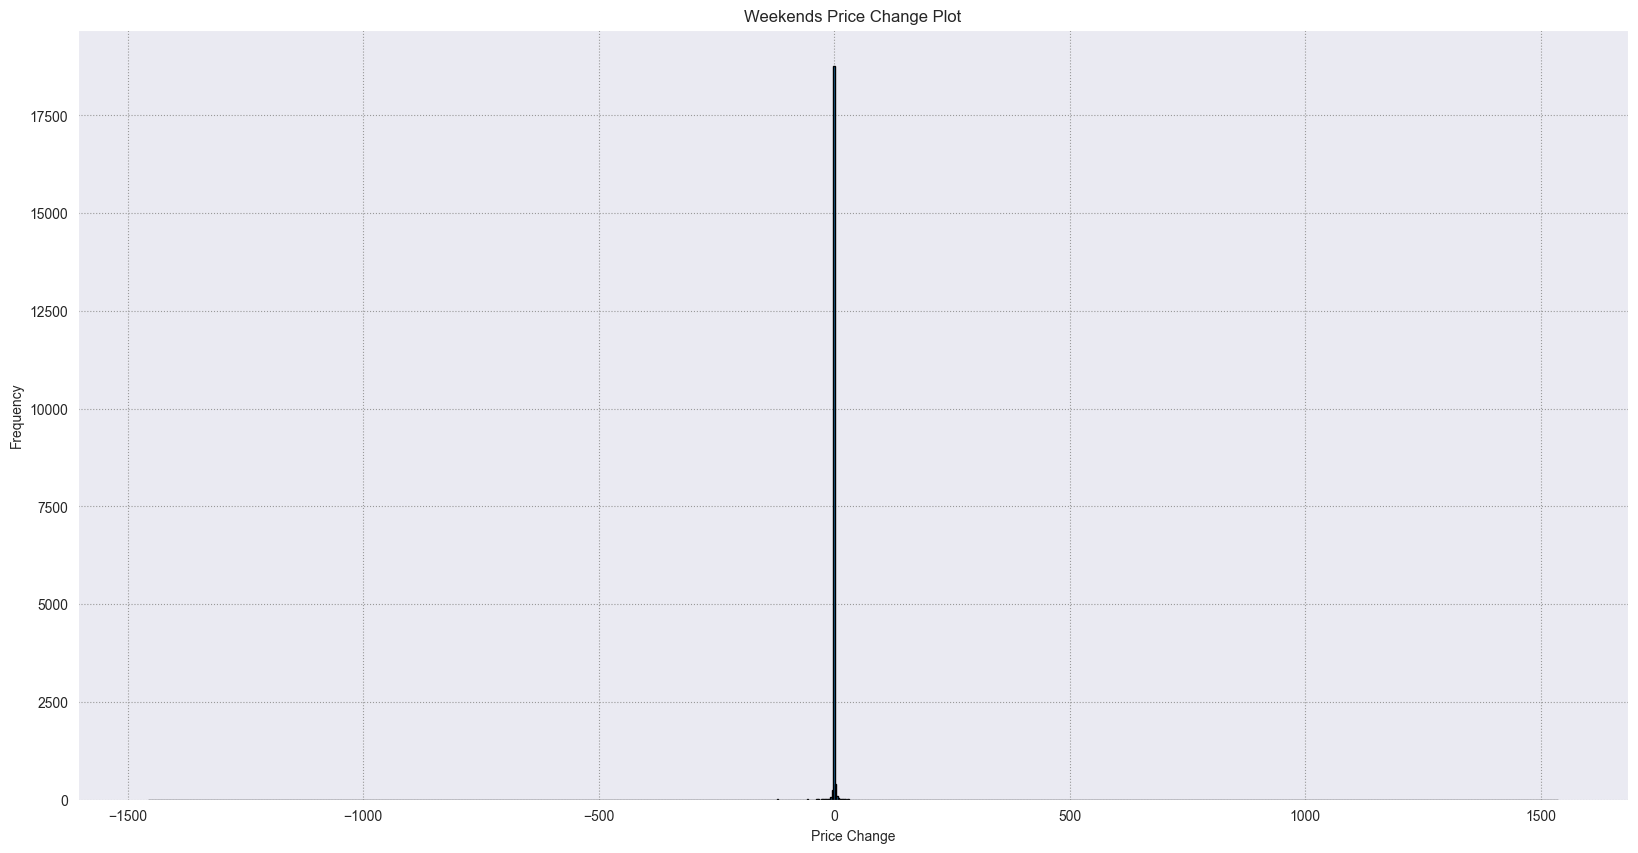

In [82]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(weekends['Price change'], bins = 1000, edgecolor = "black", align = 'mid')
ax.set_title('Weekends Price Change Plot')
ax.set_xlabel('Price Change')
ax.set_ylabel('Frequency')
plt.show()

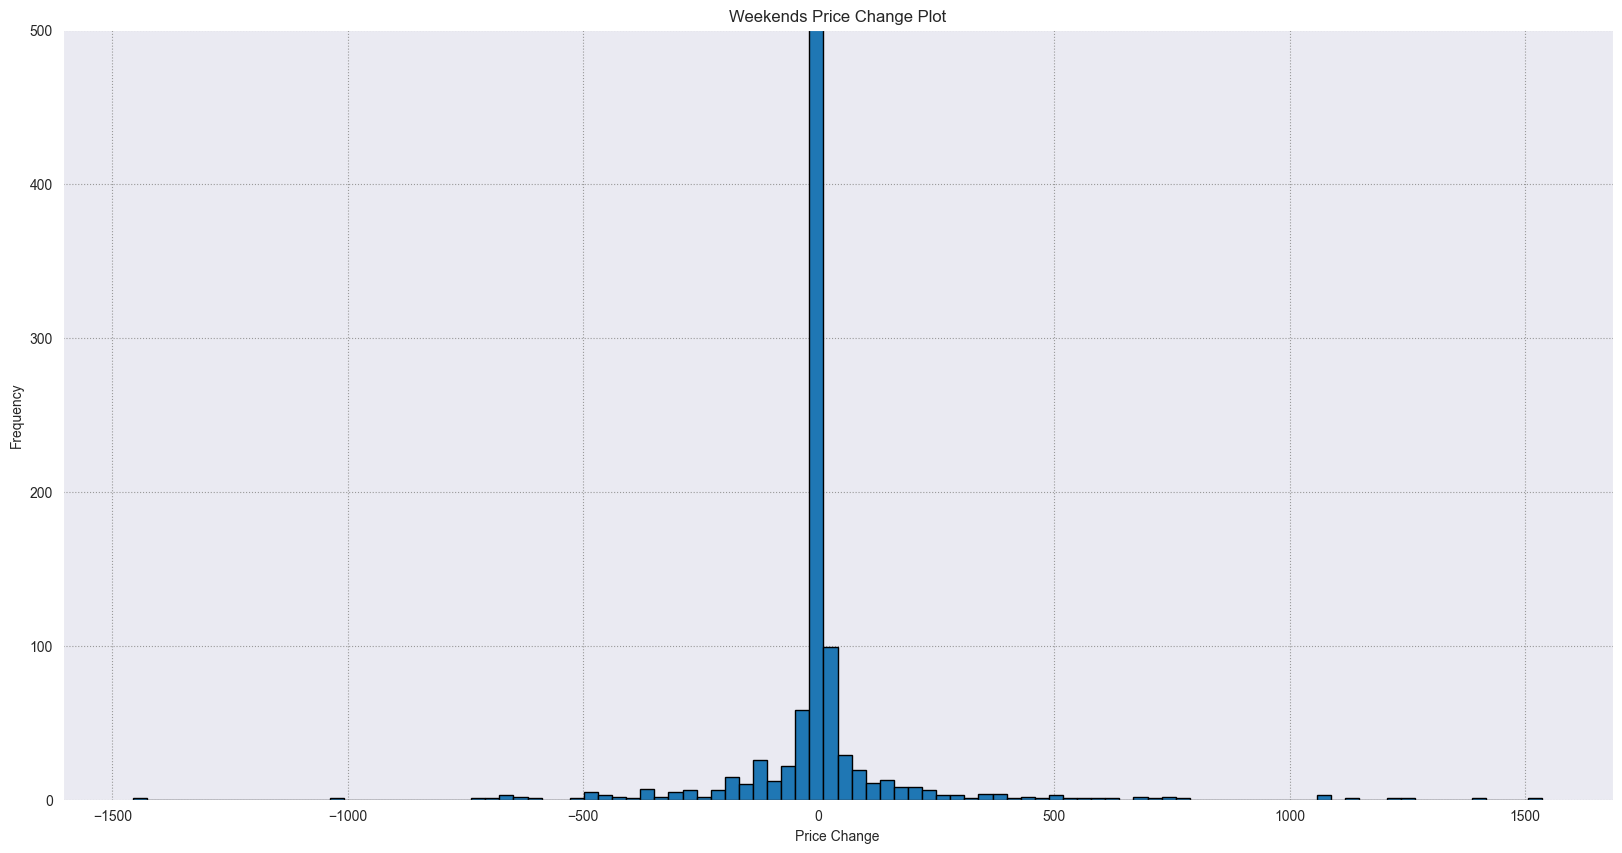

In [83]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(weekends['Price change'], bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Weekends Price Change Plot')
ax.set_xlabel('Price Change')
ax.set_ylabel('Frequency')
ax.set_ylim(0,500)
plt.show()

In this plot, it seems our data is normal.

We will use further tests to determine that.

Shapiro Normality test:

In [84]:
from scipy.stats import shapiro
stat, p = shapiro(weekends['Price change'])
p

c:\Users\ROG\anaconda3\envs\MLB\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

The Shapiro test rejects normlity!

D'Agostino Normality test:

In [85]:
from scipy.stats import normaltest
stat, p = normaltest(weekends['Price change'])
p

0.0

The D'Agostino test rejects normlity too!

These test are valid for data around 5000 or less and in this case our data seems a very narrow normal distribution, therefore these tests won't be able to accept it's normality but our data isn't that far from being normal, being a Lepokurtic set!